In [1]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from numpy import nan

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
dataset=pd.read_csv('Assignment_Train_Data.csv')
dataset.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38
0,19981651,0.8773,Ghaziabad - Rajnagar,NaN,622010.0,77.0,Y,NaN,0.0,HDFC BANK,...,0,Resident Indian,14,1,NaN,Uttar Pradesh,HDFC BANK,7901018,North 2,1
1,20524842,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,...,1,Resident Indian,40,1,N,Karnataka,HDFC BANK,10000000,North 1,1
2,20360827,86.61,Mumbai - Corporate,Y,27426.0,99.0,N,20.83070,18000000.0,EDM,...,1,Resident Indian,30,1,N,Maharashtra,EDM,30000000,NaN,1
3,21025282,NaN,Mumbai - Borivali,NaN,33493.0,3.0,Y,NaN,350000.0,Other Banks & CA,...,0,Resident Indian,12,0,NaN,Maharashtra,Ratnakar Bank,212857,West,1
4,19982717,0.8307,Mumbai - Corporate,NaN,12335.0,32.0,N,NaN,58326.0,HDFC BANK,...,0,Resident Indian,10,1,NaN,Maharashtra,HDFC BANK,116653,NaN,1


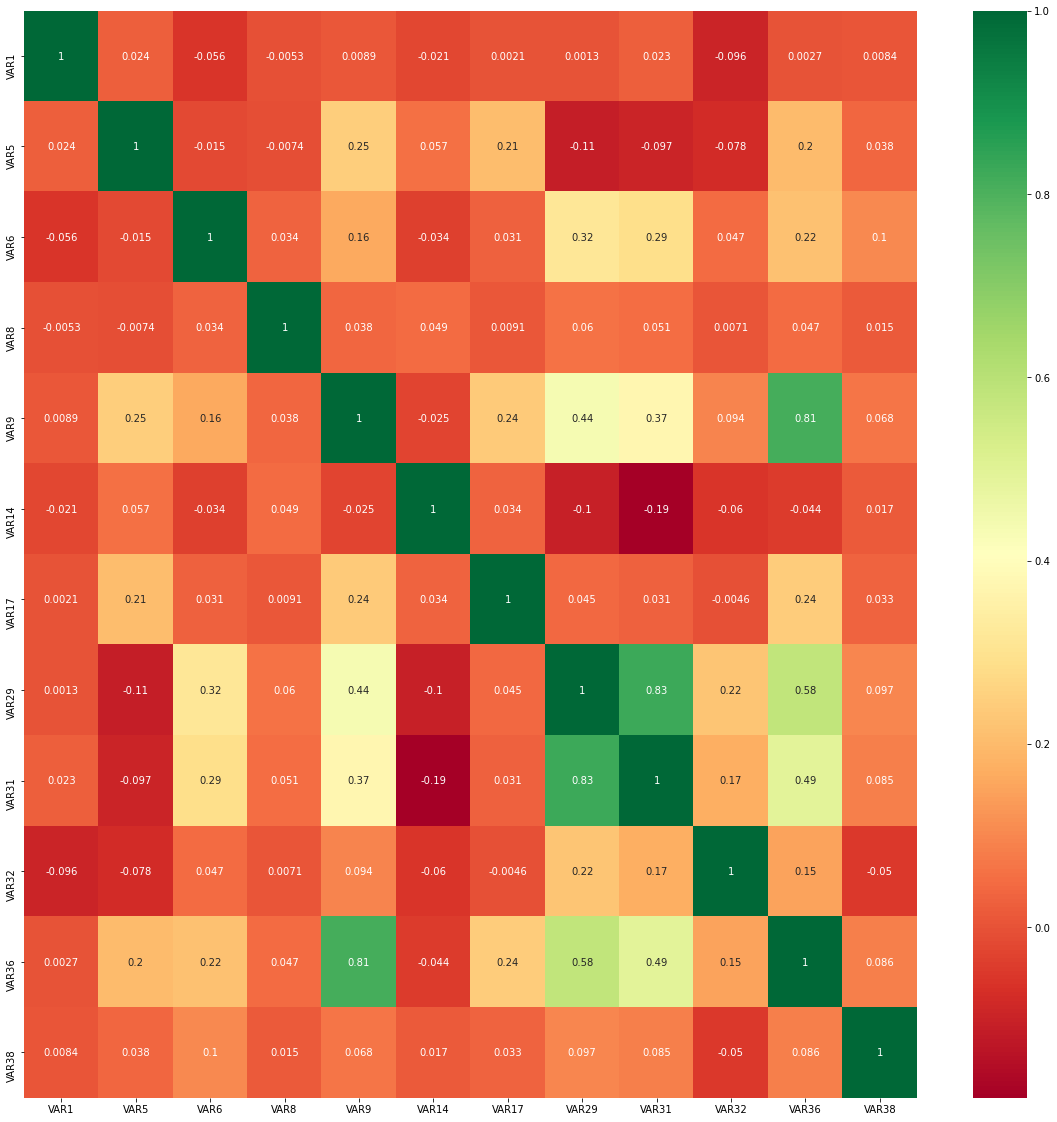

In [3]:
#correlation
#get correlation of each features
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
dataset.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
       'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR24', 'VAR25',
       'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR31', 'VAR32', 'VAR33',
       'VAR34', 'VAR35', 'VAR36', 'VAR37', 'VAR38'],
      dtype='object')

In [5]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['VAR2',
 'VAR3',
 'VAR4',
 'VAR7',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR15',
 'VAR16',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR30',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR37']

In [6]:
dataset.isnull().sum()

VAR1         0
VAR2     54091
VAR3         2
VAR4     34918
VAR5         2
VAR6         2
VAR7         0
VAR8     34930
VAR9        29
VAR10      145
VAR11     3127
VAR12      443
VAR13     3127
VAR14        2
VAR15        2
VAR16        2
VAR17     5879
VAR18     5874
VAR19        2
VAR20        2
VAR21       28
VAR22        2
VAR23    32038
VAR24     1855
VAR25        0
VAR26        2
VAR27        0
VAR28        0
VAR29        0
VAR30        2
VAR31        0
VAR32        0
VAR33    34918
VAR34     3125
VAR35      145
VAR36        0
VAR37    35272
VAR38        0
dtype: int64

# Data Preprocessing

Dropping the policy identifier

In [7]:
dataset = dataset.drop(['VAR1'],axis=1)

In [8]:
dataset.dtypes

VAR2      object
VAR3      object
VAR4      object
VAR5     float64
VAR6     float64
VAR7      object
VAR8     float64
VAR9     float64
VAR10     object
VAR11     object
VAR12     object
VAR13     object
VAR14    float64
VAR15     object
VAR16     object
VAR17    float64
VAR18     object
VAR19     object
VAR20     object
VAR21     object
VAR22     object
VAR23     object
VAR24     object
VAR25     object
VAR26     object
VAR27     object
VAR28     object
VAR29      int64
VAR30     object
VAR31      int64
VAR32      int64
VAR33     object
VAR34     object
VAR35     object
VAR36      int64
VAR37     object
VAR38      int64
dtype: object

In [9]:
dataset["VAR2"] = pd.to_numeric(dataset["VAR2"],errors = "coerce")

C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VAR2', ylabel='Density'>

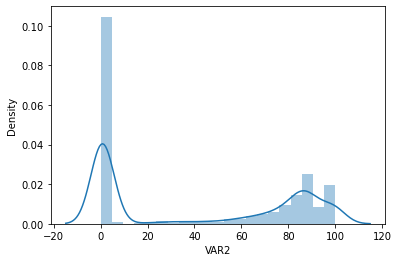

In [10]:
sns.distplot(dataset['VAR2'].dropna())

<AxesSubplot:>

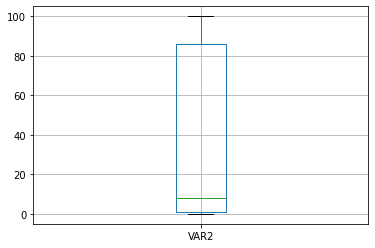

In [11]:
dataset.boxplot("VAR2")

In [12]:
dataset['VAR2'].describe()

count    44448.000000
mean        40.842592
std         41.904669
min          0.000000
25%          0.830700
50%          8.280000
75%         86.000000
max        100.000000
Name: VAR2, dtype: float64

In [13]:
dataset[dataset.VAR2.notnull()][['VAR2']]

,VAR2
0,0.8773
1,93.4700
2,86.6100
4,0.8307
5,0.8307
...,...
99989,0.8307
99991,86.6100
99992,86.6100
99994,0.8307


Agent Persistency there were outliers as in the values ranges from 0 to 1 and then there some values which was greater than 1 and then values which are null in which there many , so considered null values as people who joined the departmetn so replaced na values with 0 and for the other values we standardised the values ranging more than 1 to 0's and 1's by dividing it by 100

For Alcohol declaration we replaced the values which were null by creating another category with No response

In [14]:
for i in range(len(dataset)):
    if(dataset.VAR2[i]>1):
        dataset.VAR2[i]/=100.0
dataset['VAR2']=dataset.VAR2.fillna(0)


<ipython-input-14-81fdad31cc6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.VAR2[i]/=100.0


In [20]:
dataset = dataset.drop(["VAR3"],axis=1)
dataset['VAR4'] = dataset.VAR4.fillna('No Response')

For Annualised Premium and Mapped agent vintage there were just 2 null values so we dropped those 2 rows so like this for columns which had all null values as 2 were dropped as in age,education,gender, marital status, nationality,Applicant's Policy PAR/NON PAR/ULIP Tag,Applicant's Policy Premium Payment Frequency,Application Life Assured Residential Status

In [21]:
dataset = dataset.dropna(how='any', subset=['VAR5', 'VAR6'])

For BMI since there were around 34000 null values we thought imputation, so for imputation we thought we will impute the null values by seeing the age and then then putting the ideal BMI for Age but that wont work so since the BMI were Missing values at Random we randomly imputed the BMI values in the range of which is already present in the column say if values already present in the dataset ranged from 18 to 30 this range was taken to impute .Also we found there were outliers in BMI after doinf this plotted the distribution graph and found it was left skewed so we FOUND THE upper and lower boundary using 1st Quartile - 3*IQR and .. we placed the upper values with upper boundary and the lower values with Lower boundary

C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VAR8', ylabel='Density'>

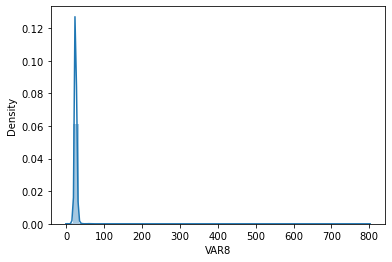

In [22]:
sns.distplot(dataset['VAR8'].dropna())

<AxesSubplot:>

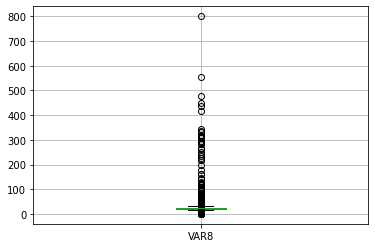

In [23]:
dataset.boxplot("VAR8")

Text(0.5, 1.0, 'BMI vs Age')

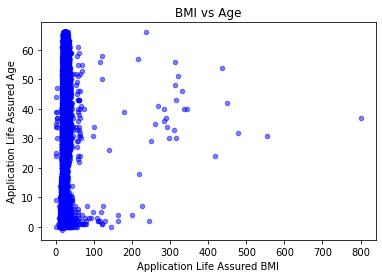

In [24]:
dataset.plot(kind='scatter',x='VAR8',y='VAR14',alpha=0.5,color='blue')
plt.xlabel('Application Life Assured BMI')
plt.ylabel('Application Life Assured Age')
plt.title('BMI vs Age')

In [25]:
dataset['VAR8'].describe()

count    65070.000000
mean        24.286576
std          7.903450
min          0.734620
25%         22.313280
50%         23.888440
75%         25.711660
max        800.000000
Name: VAR8, dtype: float64

In [26]:
def impute_nan(df,variable):
    dataset[variable+"_random"]=dataset[variable]
    
    random_sample=dataset[variable].dropna().sample(dataset[variable].isnull().sum(),random_state=0)
    
    random_sample.index=dataset[dataset[variable].isnull()].index
    dataset.loc[dataset[variable].isnull(),variable+'_random']=random_sample

In [27]:
impute_nan(dataset,"VAR8")
dataset = dataset.drop(["VAR8"],axis = 1)
dataset=dataset.rename(columns = {'VAR8_random':'VAR8'})

<AxesSubplot:>

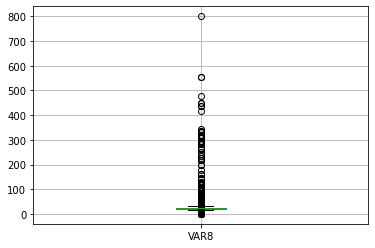

In [28]:
dataset.boxplot("VAR8")

C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VAR8', ylabel='Density'>

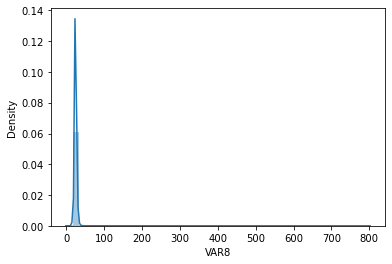

In [29]:
sns.distplot(dataset['VAR8'])

In [30]:
dataset.isnull().sum()

VAR2         0
VAR4         0
VAR5         0
VAR6         0
VAR7         0
VAR9        27
VAR10      143
VAR11     3125
VAR12      441
VAR13     3125
VAR14        0
VAR15        0
VAR16        0
VAR17     5877
VAR18     5872
VAR19        0
VAR20        0
VAR21       26
VAR22        0
VAR23    32036
VAR24     1853
VAR25        0
VAR26        0
VAR27        0
VAR28        0
VAR29        0
VAR30        0
VAR31        0
VAR32        0
VAR33    34916
VAR34     3123
VAR35      143
VAR36        0
VAR37    35270
VAR38        0
VAR8         0
dtype: int64

In [31]:
dataset.VAR10.value_counts().sort_values(ascending=False)

HDFC BANK                   54276
Agency                      14244
EDM                          8909
Brokers & Small CA           6220
Direct                       5863
Ex-HDFC                      4794
Other Banks & CA             3449
NBFC & MFI - 1                934
NBFC & MFI - 2                494
Emerging Channels             356
PSU Cooperative & Others      277
Int. Business                  36
Banca                           3
Name: VAR10, dtype: int64

In [32]:
dataset['VAR10'].mode()[0]

'HDFC BANK'

In [33]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [34]:
impute_nan(dataset,'VAR10')

In [35]:
dataset.isnull().sum()

VAR2         0
VAR4         0
VAR5         0
VAR6         0
VAR7         0
VAR9        27
VAR10        0
VAR11     3125
VAR12      441
VAR13     3125
VAR14        0
VAR15        0
VAR16        0
VAR17     5877
VAR18     5872
VAR19        0
VAR20        0
VAR21       26
VAR22        0
VAR23    32036
VAR24     1853
VAR25        0
VAR26        0
VAR27        0
VAR28        0
VAR29        0
VAR30        0
VAR31        0
VAR32        0
VAR33    34916
VAR34     3123
VAR35      143
VAR36        0
VAR37    35270
VAR38        0
VAR8         0
dtype: int64

<AxesSubplot:>

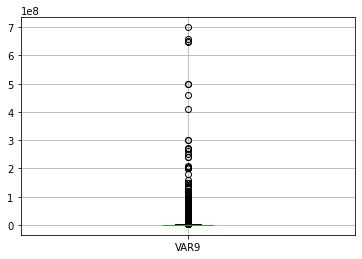

In [36]:
dataset.boxplot("VAR9")

<AxesSubplot:>

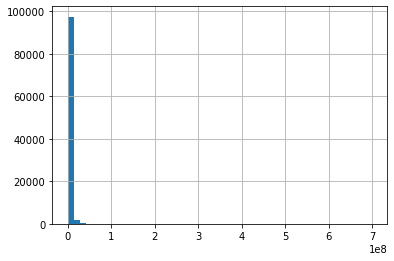

In [37]:
dataset.VAR9.hist(bins=50)

In [38]:
dataset = dataset.dropna(how='any', subset=['VAR9'])

In [39]:
dataset.isnull().sum()

VAR2         0
VAR4         0
VAR5         0
VAR6         0
VAR7         0
VAR9         0
VAR10        0
VAR11     3124
VAR12      441
VAR13     3124
VAR14        0
VAR15        0
VAR16        0
VAR17     5851
VAR18     5845
VAR19        0
VAR20        0
VAR21        0
VAR22        0
VAR23    32025
VAR24     1853
VAR25        0
VAR26        0
VAR27        0
VAR28        0
VAR29        0
VAR30        0
VAR31        0
VAR32        0
VAR33    34889
VAR34     3122
VAR35      143
VAR36        0
VAR37    35259
VAR38        0
VAR8         0
dtype: int64

In [40]:
dataset = dataset.drop(['VAR11'],axis=1)

In [41]:
dataset = dataset.drop(['VAR12'],axis=1)

For City Tier since it is an Ordinal Variable and it missing values at random(3127) so we randomly imputed the values

In [42]:
dataset[dataset.VAR13.notnull()][['VAR13']]

,VAR13
0,Tier II
1,Tier I
2,Tier I
3,Tier I
4,Tier III
...,...
99995,Tier III
99996,Tier II
99997,Tier III
99998,Tier II


In [43]:
def impute_nan(df,variable):
    dataset[variable+"_random"]=dataset[variable]
    
    random_sample=dataset[variable].dropna().sample(dataset[variable].isnull().sum(),random_state=0)
    
    random_sample.index=dataset[dataset[variable].isnull()].index
    dataset.loc[dataset[variable].isnull(),variable+'_random']=random_sample

In [44]:
impute_nan(dataset,"VAR13")
dataset = dataset.drop(["VAR13"],axis = 1)
dataset=dataset.rename(columns = {'VAR13_random':'VAR13'})

In [45]:
dataset.isnull().sum()

VAR2         0
VAR4         0
VAR5         0
VAR6         0
VAR7         0
VAR9         0
VAR10        0
VAR14        0
VAR15        0
VAR16        0
VAR17     5851
VAR18     5845
VAR19        0
VAR20        0
VAR21        0
VAR22        0
VAR23    32025
VAR24     1853
VAR25        0
VAR26        0
VAR27        0
VAR28        0
VAR29        0
VAR30        0
VAR31        0
VAR32        0
VAR33    34889
VAR34     3122
VAR35      143
VAR36        0
VAR37    35259
VAR38        0
VAR8         0
VAR13        0
dtype: int64

<AxesSubplot:xlabel='VAR14', ylabel='Count'>

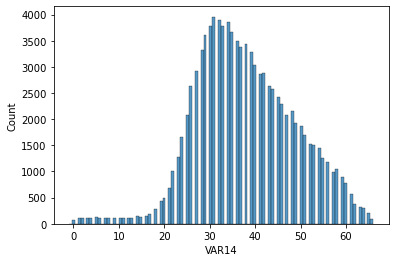

In [46]:
sns.histplot(dataset['VAR14'].dropna())

<AxesSubplot:>

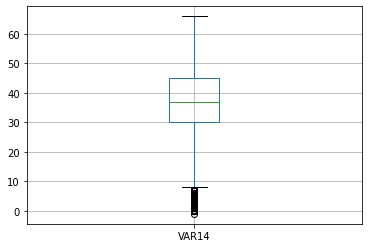

In [47]:
dataset.boxplot(column="VAR14")

In [48]:
dataset['VAR14'].describe()

count    99971.000000
mean        37.834972
std         10.934254
min         -1.000000
25%         30.000000
50%         37.000000
75%         45.000000
max         66.000000
Name: VAR14, dtype: float64

For age we plotted the outliers and found there were age which were negative and some values we plotted the distribution plot and it was normal distributed so we got the upper boundary and lower boundary (using mean +3sd and mean -3sd) so for we replaced Values which were less than 18 as 18 and for the upper boundary we replaced the values above 71 as 71 (since 71 was the upper boundary)

In [49]:
uppper_boundary=dataset['VAR14'].mean() + 3* dataset['VAR14'].std()
lower_boundary=dataset['VAR14'].mean() - 3* dataset['VAR14'].std()
print(lower_boundary), print(uppper_boundary),print(dataset['VAR14'].mean())

5.032208695486261
70.63773558835605
37.834972141921156


(None, None, None)

<AxesSubplot:>

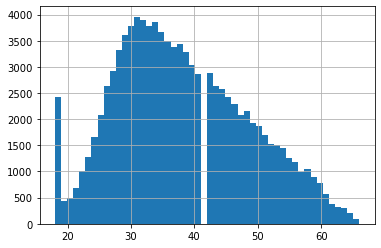

In [50]:
dataset.loc[dataset['VAR14']>=71,'VAR14']=71
dataset.loc[dataset['VAR14']<=18,'VAR14']=18
dataset.VAR14.hist(bins=50)

In [51]:
dataset["VAR18"]=dataset.VAR18.fillna("Not Disclosed")

Income - replaced NA Values with mean income of industry column & for Income less than 5000 -replaced with 5000

In [52]:
temp=dataset.groupby('VAR18')['VAR17'].mean()
temp

VAR18
Accounts       7.667868e+05
Ad Agency      8.904585e+05
Advertising    8.413140e+05
Aeronautics    2.595824e+06
Agriculture    4.454873e+05
                   ...     
Yarn           2.445762e+06
e-Commerce     2.287208e+06
e-banking      8.364286e+05
e-broking      2.524400e+06
e-finance      7.076667e+05
Name: VAR17, Length: 330, dtype: float64

In [53]:
find_set = dataset.VAR18.unique() 
find_set

array(['Legal And Justice', 'Trading', 'Insurance', 'Consultant',
       'Sales And Marketing', 'Service', 'Fmcg', 'Medical', 'IT Industry',
       'Pharmaceutical', 'Interior Design', 'Engineering', 'Software',
       'Dental', 'Manufacturing', 'Building Materials', 'School',
       'Finance', 'Auto Ancillary', 'Business', 'Automobile', 'Doctor',
       'Central Government', 'Sales', 'Teaching', 'Hotel', 'Retail',
       'State Government', 'Labour', 'Cloth', 'Civil', 'Hardware',
       'Not Disclosed', 'Paint', 'Property Dealing', 'Banking & Finance',
       'Travel And Tour', 'Army', 'Instrumentation', 'Railways',
       'Motor Parts', 'Medicine', 'Agriculture', 'Garments', 'Education',
       'Clothes', 'Fabrication Industry', 'Jewellery', 'Interiors',
       'Logistics', 'Construction', 'Leather', 'Transport', 'Accounts',
       'Banking', 'Information Technology', 'Trader', 'Consumer Products',
       'Textile', 'Electronics', 'Astrology', 'Mechanical',
       'Pharmaceutials', '

In [54]:
for i in range(len(find_set)):
    a=str(find_set[i]).strip()
    #print(a)
    dataset.loc[(dataset['VAR18']== a) & (dataset['VAR17'].isna()==True),'VAR17']=temp[a]

<AxesSubplot:>

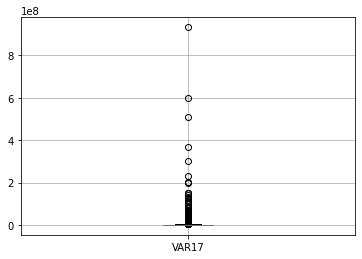

In [55]:
dataset.boxplot(column="VAR17")

In [56]:
dataset = dataset.drop(["VAR27"],axis = 1)

In [57]:
lst_7=dataset.VAR10.value_counts().sort_values(ascending=False).head(7).index

In [58]:
lst_7=list(lst_7)
lst_7

['HDFC BANK',
 'Agency',
 'EDM',
 'Brokers & Small CA',
 'Direct',
 'Ex-HDFC',
 'Other Banks & CA']

In [59]:
for categories in lst_7:
    dataset[categories]=np.where(dataset['VAR10']==categories,1,0)

In [60]:
A = dataset['VAR15'].value_counts()
A

B A           15996
Graduation    12389
H S C          8312
S S C          8097
B Com          7769
              ...  
DTE               9
BMLT              7
BPY               7
PBM               6
MPY               3
Name: VAR15, Length: 67, dtype: int64

Education -Also after this we found there too many categories so which creating dummy variables it will increase the dimensions so for treating this we replaced the top 10 Frequent categories as 1's and the other as 0's

In [61]:
lst_10=dataset.VAR15.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)
lst_10

['B A',
 'Graduation',
 'H S C',
 'S S C',
 'B Com',
 'Under Matric (Class l to lX)',
 'MBA',
 'B E',
 'B Tech',
 'B Sc']

In [62]:
for categories in lst_10:
    dataset[categories]=np.where(dataset['VAR15']==categories,1,0)

In [63]:
dataset["VAR33"]=dataset.VAR33.fillna("Not Disclosed") 

In [64]:
dataset['VAR24'].mode()[0] 

'Cheque'

In [65]:
def impute_nan(df,variable): 
    most_frequent_category=df[variable].mode()[0] 
    df[variable].fillna(most_frequent_category,inplace=True) 

In [66]:
impute_nan(dataset,'VAR24')

dataset['VAR5'].describe()

count    9.997100e+04
mean     5.920938e+04
std      1.373097e+05
min      9.200000e+02
25%      2.390700e+04
50%      3.450000e+04
75%      5.837300e+04
max      2.000000e+07
Name: VAR5, dtype: float64

<AxesSubplot:>

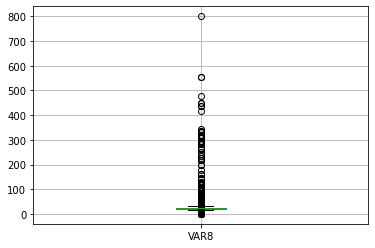

In [67]:
dataset.boxplot("VAR8")

In [68]:
IQR=dataset.VAR8.quantile(0.75)-dataset.VAR8.quantile(0.25)

In [69]:
lower_bridge=dataset['VAR8'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset['VAR8'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

17.21571
30.80923


(None, None)

In [70]:
dataset.loc[dataset['VAR8']>=31,'VAR8']=31
dataset.loc[dataset['VAR8']<=17,'VAR8']=17

In [71]:
dataset.isnull().sum()

VAR2                                0
VAR4                                0
VAR5                                0
VAR6                                0
VAR7                                0
VAR9                                0
VAR10                               0
VAR14                               0
VAR15                               0
VAR16                               0
VAR17                               0
VAR18                               0
VAR19                               0
VAR20                               0
VAR21                               0
VAR22                               0
VAR23                           32025
VAR24                               0
VAR25                               0
VAR26                               0
VAR28                               0
VAR29                               0
VAR30                               0
VAR31                               0
VAR32                               0
VAR33                               0
VAR34       

In [72]:
dataset = dataset.drop(['VAR18'],axis=1)
dataset = dataset.drop(['VAR34'],axis=1)
dataset = dataset.drop(['VAR23','VAR37'],axis=1)
dataset = dataset.drop(['VAR28'],axis=1)
dataset = dataset.drop(['VAR10'],axis=1)
dataset = dataset.drop(['VAR15'],axis=1)
dataset = dataset.drop(['VAR35'],axis=1)

In [73]:
dataset = pd.get_dummies( dataset,drop_first = True )

In [74]:
dataset

,VAR2,VAR5,VAR6,VAR9,VAR14,VAR17,VAR29,VAR31,VAR32,VAR36,...,VAR26_Monthly Premium,VAR26_Quarterly Premium,VAR30_NRI,VAR30_OCI,VAR30_PIO,VAR30_Resident Indian,VAR33_Not Disclosed,VAR33_Y,VAR13_Tier II,VAR13_Tier III
0,0.8773,622010.0,77.0,0.0,46.0,7.200000e+06,0,14,1,7901018,...,0,0,0,0,0,1,1,0,1,0
1,0.9347,7157.0,33.0,10000000.0,24.0,4.950000e+05,1,40,1,10000000,...,0,0,0,0,0,1,0,0,0,0
2,0.8661,27426.0,99.0,18000000.0,33.0,2.500000e+06,1,30,1,30000000,...,0,0,0,0,0,1,0,0,0,0
3,0.0000,33493.0,3.0,350000.0,28.0,4.500000e+05,0,12,0,212857,...,0,0,0,0,0,1,1,0,0,0
4,0.8307,12335.0,32.0,58326.0,37.0,2.500000e+05,0,10,1,116653,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0000,25000.0,11.0,625000.0,33.0,3.000000e+05,0,10,1,1250000,...,0,0,0,0,0,1,0,0,0,1
99996,0.6258,57416.0,68.0,363991.0,18.0,5.000000e+06,0,17,0,363991,...,0,0,0,0,0,1,0,0,1,0
99997,0.0000,60000.0,0.0,296839.0,18.0,1.331086e+06,0,18,0,296839,...,1,0,0,0,0,1,0,0,0,1
99998,0.0000,50000.0,13.0,214537.0,22.0,5.000000e+05,0,15,0,214537,...,0,0,0,0,0,1,1,0,1,0


# Feature Selection

In [75]:
X=dataset.drop(['VAR38'],axis=1)
Y=dataset['VAR38']

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [79]:
model=ExtraTreesClassifier()
model.fit(X_scaled,Y)
print(model.feature_importances_)

[3.25310703e-02 5.16246349e-02 5.93473114e-02 5.17931941e-02
 5.78489609e-02 5.41176150e-02 2.33085857e-03 3.09548264e-02
 1.63787448e-02 5.33653006e-02 5.91114909e-02 9.78670778e-03
 7.25942021e-03 7.24310409e-03 6.46774535e-03 4.34894229e-03
 3.24943381e-03 4.28174428e-03 1.19702231e-02 1.13337199e-02
 9.57335575e-03 9.35926120e-03 9.30699981e-03 7.61471797e-03
 6.27656782e-03 5.22337537e-03 4.61735567e-03 5.58267978e-03
 5.99777738e-03 2.39849239e-03 2.03464286e-01 1.39251943e-02
 8.98999561e-03 8.53288686e-03 1.37630045e-03 3.67624640e-04
 2.36452235e-03 2.49377422e-03 9.94776210e-03 1.03849106e-02
 1.79397058e-03 5.09387364e-04 8.71864825e-03 3.93142599e-03
 8.61581612e-03 1.12306154e-03 8.65642169e-03 3.48358737e-03
 4.77516279e-03 1.01356656e-02 5.60819398e-03 6.87827822e-03
 4.66584445e-03 9.09994046e-04 2.90270666e-03 6.90503152e-03
 7.00806035e-03 9.40062937e-03 3.09386206e-03 1.57169473e-03
 2.08342219e-04 1.23438658e-04 1.69310596e-03 6.03486373e-03
 1.74231225e-03 1.238866

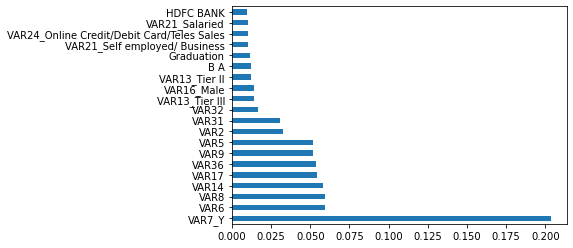

In [80]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

Auto Debit of Premium Opted Flag is the most important feature in the dataset

check correlation Checking VIF

In [81]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_scaled,Y)
selected_feat = X.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

selected_feat

a=X.columns
X_scaled=pd.DataFrame(X_scaled,columns = a)

X_new = X_scaled[['VAR2', 'VAR5', 'VAR6', 'VAR9', 'VAR14', 'VAR31', 'VAR32', 'VAR36',
       'VAR8', 'HDFC BANK', 'EDM', 'Brokers & Small CA', 'Direct',
       'Other Banks & CA', 'B A', 'Graduation', 'H S C', 'S S C',
       'Under Matric (Class l to lX)', 'MBA', 'B E', 'B Tech',
       'VAR4_No Response', 'VAR7_Y', 'VAR16_Male', 'VAR21_Others',
       'VAR21_Salaried', 'VAR21_Self employed/ Business', 'VAR21_Student',
       'VAR22_Par', 'VAR24_DD', 'VAR24_ECS,SI',
       'VAR24_Online Credit/Debit Card/Teles Sales', 'VAR24_Online Netbanking',
       'VAR25_Savings', 'VAR26_Halfyearly Premium', 'VAR26_Monthly Premium',
       'VAR13_Tier III','VAR17']]


X_new.isnull().sum()

total features: 67
selected features: 38


VAR2                                          0
VAR5                                          0
VAR6                                          0
VAR9                                          0
VAR14                                         0
VAR31                                         0
VAR32                                         0
VAR36                                         0
VAR8                                          0
HDFC BANK                                     0
EDM                                           0
Brokers & Small CA                            0
Direct                                        0
Other Banks & CA                              0
B A                                           0
Graduation                                    0
H S C                                         0
S S C                                         0
Under Matric (Class l to lX)                  0
MBA                                           0
B E                                     

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [83]:
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['variable'] = X_new.columns

In [84]:
Y.value_counts()

1    76668
0    23303
Name: VAR38, dtype: int64

In [85]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [86]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_new,Y)

X_res.shape,y_res.shape

((149998, 39), (149998,))

In [87]:
import pickle
with open('x_res_obj.pkl', 'wb') as fv:
    pickle.dump(X_res, fv)
with open('y_resobj.pkl', 'wb') as dfv:
    pickle.dump(y_res, dfv)
#Saving as an Object to be used later

# Model Building

In [16]:
#Loading the Object
with open('x_res_obj.pkl', 'rb') as fv:
    X_res = pickle.load(fv)
with open('y_resobj.pkl', 'rb') as dfv:
    y_res = pickle.load(dfv)

In [2]:
from sklearn.model_selection import train_test_split

In [18]:

train_x,test_x,train_y,test_y =  train_test_split(X_res,y_res,train_size= 0.8 , random_state=5)

In [19]:
train_x

,VAR2,VAR5,VAR6,VAR9,VAR14,VAR31,VAR32,VAR36,VAR8,HDFC BANK,...,VAR22_Par,VAR24_DD,"VAR24_ECS,SI",VAR24_Online Credit/Debit Card/Teles Sales,VAR24_Online Netbanking,VAR25_Savings,VAR26_Halfyearly Premium,VAR26_Monthly Premium,VAR13_Tier III,VAR17
103819,-0.857450,-0.352334,-0.629270,-0.264498,-0.583357,-0.255885,-0.908123,-0.349300,-0.733170,-1.092717,...,1.508862,-0.447973,-0.223890,1.927939,-0.252595,1.297330,-0.182899,-0.324706,0.970477,-0.163262
84340,1.522824,-0.316632,1.574462,1.606614,-0.860733,2.663101,-0.908123,1.925476,0.948401,-1.092717,...,-0.662751,-0.447973,-0.223890,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,0.970477,-0.090575
79550,-0.857450,-0.139899,-0.498119,-0.228448,0.474915,-0.610042,1.101172,-0.238787,-0.192303,0.915150,...,-0.662751,-0.447973,4.466486,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,0.970477,-0.113930
147832,1.119843,-0.216402,0.087845,-0.260757,-0.529565,-0.610042,1.101172,-0.338931,0.071488,0.915150,...,1.508862,-0.447973,-0.223890,-0.518689,-0.252595,1.297330,-0.182899,-0.324706,0.970477,-0.066387
50139,-0.857450,0.145741,-0.932693,12.290192,-0.383716,1.681158,-0.908123,9.927156,0.177674,0.915150,...,-0.662751,-0.447973,-0.223890,1.927939,-0.252595,-0.770814,-0.182899,-0.324706,-1.030421,1.032718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121974,1.172323,-0.099026,-0.267666,-0.150508,2.013051,-0.514297,-0.908123,-0.293205,0.099045,-1.092717,...,-0.662751,-0.447973,-0.223890,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,0.970477,-0.025925
124605,-0.036629,-0.181751,-0.330363,-0.253103,0.485401,0.052581,-0.908123,-0.329650,0.622864,-1.092717,...,1.508862,-0.447973,-0.223890,-0.518689,-0.252595,1.297330,-0.182899,-0.324706,-1.030421,-0.143968
20463,-0.857450,-0.067070,-0.832407,-0.215879,0.284108,-0.610042,-0.908123,-0.284511,2.470306,0.915150,...,-0.662751,-0.447973,-0.223890,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,-1.030421,0.111305
18638,0.778750,0.297072,0.538172,-0.153034,-0.860733,-0.610042,-0.908123,-0.208305,-0.370281,0.915150,...,-0.662751,-0.447973,4.466486,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,-1.030421,0.418442


In [20]:
test_x

,VAR2,VAR5,VAR6,VAR9,VAR14,VAR31,VAR32,VAR36,VAR8,HDFC BANK,...,VAR22_Par,VAR24_DD,"VAR24_ECS,SI",VAR24_Online Credit/Debit Card/Teles Sales,VAR24_Online Netbanking,VAR25_Savings,VAR26_Halfyearly Premium,VAR26_Monthly Premium,VAR13_Tier III,VAR17
20573,-0.857450,-0.249141,0.070169,-0.247301,1.142738,-0.610042,1.101172,-0.284511,0.195719,0.915150,...,-0.662751,-0.447973,-0.22389,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,-1.030421,-0.093454
144518,-0.857450,-0.189682,-0.693093,-0.247334,0.208360,-0.064518,1.101172,-0.322654,-0.475667,-1.092717,...,1.508862,-0.447973,-0.22389,-0.518689,-0.252595,1.297330,-0.182899,-0.324706,-1.030421,-0.124871
24373,-0.857450,0.442728,0.404457,-0.127897,-0.097506,-0.064518,-0.908123,-0.177822,-0.242458,-1.092717,...,-0.662751,-0.447973,-0.22389,-0.518689,-0.252595,-0.770814,-0.182899,3.079714,0.970477,-0.122120
79616,1.119843,-0.249141,0.170455,-0.247301,-0.956136,-0.610042,1.101172,-0.284511,0.221830,0.915150,...,-0.662751,-0.447973,-0.22389,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,-1.030421,-0.113930
97057,1.119843,-0.249141,0.003312,-0.247301,-0.956136,-0.610042,-0.908123,-0.322615,-0.837887,0.915150,...,-0.662751,-0.447973,-0.22389,-0.518689,-0.252595,-0.770814,-0.182899,-0.324706,-1.030421,-0.052502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94072,-0.857450,-0.067070,-0.798978,-0.213051,2.192176,-0.064518,1.101172,-0.271105,-0.123373,-1.092717,...,1.508862,-0.447973,-0.22389,-0.518689,-0.252595,1.297330,-0.182899,-0.324706,0.970477,-0.052502
12206,-0.857450,-0.049300,-0.765549,-0.215879,0.379511,0.917425,-0.908123,-0.284511,-0.481154,-1.092717,...,1.508862,2.232278,-0.22389,-0.518689,-0.252595,1.297330,-0.182899,-0.324706,0.970477,-0.072978
49984,-0.857450,-0.212727,-0.665263,-0.255918,-0.383716,0.044587,-0.908123,-0.333063,-1.059533,-1.092717,...,1.508862,2.232278,-0.22389,-0.518689,-0.252595,1.297330,-0.182899,-0.324706,-1.030421,-0.093454
60132,1.119843,-0.212727,0.203884,-0.241017,0.665721,-0.610042,-0.908123,-0.269270,-0.199150,0.915150,...,-0.662751,-0.447973,-0.22389,1.927939,-0.252595,-0.770814,-0.182899,-0.324706,-1.030421,-0.093454


In [21]:
train_y

103819    0
84340     1
79550     1
147832    0
50139     1
         ..
121974    0
124605    0
20463     0
18638     1
35683     1
Name: VAR38, Length: 119998, dtype: int64

In [22]:
#########Gradient Boosting
## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)
## Fitting gradient boosting model to training set
gboost_clf.fit(train_x, train_y )
predicted_classes_gboost = gboost_clf.predict(test_x)
conf_mat_gboost = confusion_matrix(test_y,predicted_classes_gboost)
accuracy_gboost = accuracy_score(test_y,predicted_classes_gboost)
gboost_roc_auc = roc_auc_score(test_y, gboost_clf.predict_proba(test_x)[:,1])
precision_gboost = precision_score(test_y,predicted_classes_gboost)
recall_gboost = recall_score(test_y,predicted_classes_gboost)
F1_gboost = f1_score(test_y,predicted_classes_gboost)

Text(33.0, 0.5, 'Actual Classes')

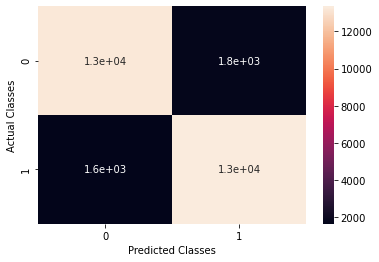

In [24]:
sns.heatmap(conf_mat_gboost,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [25]:
print("Confusion matrix (gBoost):")
print(conf_mat_gboost)
print("accuracy score (gBoost)", accuracy_gboost)
print("Precision score (gBoost)",precision_gboost)
print("Recall score (gBoost)", recall_gboost)
print("F1 score (gBoost)", F1_gboost)

Confusion matrix (gBoost):
[[13246  1760]
 [ 1650 13344]]
accuracy score (gBoost) 0.8863333333333333
Precision score (gBoost) 0.8834745762711864
Recall score (gBoost) 0.8899559823929571
F1 score (gBoost) 0.8867034354442155


In [27]:
#10 fold cross validation - to validate if there is overfitting
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)
cv_scores = cross_val_score( gboost_clf, train_x, train_y, cv = 10, scoring = 'roc_auc' )
print( cv_scores )
print( "Mean Accuracy: ", np.mean(cv_scores), " with standard deviation of: ",np.std(cv_scores))
###########################################################################################

[0.95830614 0.96126575 0.95670928 0.95934064 0.96075961 0.96159178
 0.95955325 0.96260025 0.95991196 0.96055187]
Mean Accuracy:  0.960059051630026  with standard deviation of:  0.001615053630465077


In [28]:
################Building the LogR model
model_lr = LogisticRegression(solver='newton-cg', C=100,penalty='l2')
model_lr.fit(train_x,train_y)
test_predicted_classes_lr = model_lr.predict(test_x)

Confusion Matrix for LR Model
[[13023  1983]
 [ 3908 11086]]


Text(33.0, 0.5, 'Actual Classes')

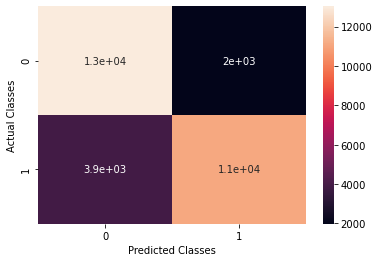

In [30]:
print("Confusion Matrix for LR Model")
test_conf_mat_lr = confusion_matrix(test_y.tolist(),test_predicted_classes_lr)
print(test_conf_mat_lr)
sns.heatmap(test_conf_mat_lr,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [31]:
# accuracy_lr = accuracy_score(train_y,predicted_classes_lr)
# print(accuracy_lr)
test_accuracy_lr = accuracy_score(test_y,test_predicted_classes_lr)
precision_lr = precision_score(test_y,test_predicted_classes_lr)
recall_lr = recall_score(test_y,test_predicted_classes_lr)
F1_lr = f1_score(test_y,test_predicted_classes_lr)
print("accuracy score (LR)", test_accuracy_lr)
print("Precision score (LR)",precision_lr)
print("Recall score (LR)", recall_lr)
print("F1 score (LR)", F1_lr)
###########################################################################################

accuracy score (LR) 0.8036333333333333
Precision score (LR) 0.8482668911163823
Recall score (LR) 0.7393624116313192
F1 score (LR) 0.7900794640630011


In [32]:

#Buliding the NB model
model_nb = GaussianNB()
model_nb.fit(train_x,train_y)

GaussianNB()

Confusion Matrix for NB Model
[[12571  2435]
 [ 6400  8594]]


Text(33.0, 0.5, 'Actual Classes')

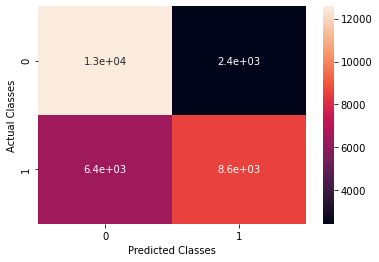

In [33]:
test_predicted_classes_nb = model_nb.predict(test_x)

print("Confusion Matrix for NB Model")
test_conf_mat_nb = confusion_matrix(test_y.tolist(),test_predicted_classes_nb)
print(test_conf_mat_nb)
sns.heatmap(test_conf_mat_nb,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [34]:
# accuracy_nb = accuracy_score(train_y,predicted_classes_nb)
# print(accuracy_nb)

test_accuracy_nb = accuracy_score(test_y,test_predicted_classes_nb)
precision_nb = precision_score(test_y,test_predicted_classes_nb)
recall_nb = recall_score(test_y,test_predicted_classes_nb)
F1_nb = f1_score(test_y,test_predicted_classes_nb)
print("accuracy score (NB)", test_accuracy_nb)
print("Precision score (NB)",precision_nb)
print("Recall score (NB)", recall_nb)
print("F1 score (NB)", F1_nb)
###########################################################################################


accuracy score (NB) 0.7055
Precision score (NB) 0.7792184241545018
Recall score (NB) 0.5731625983726824
F1 score (NB) 0.6604926411251585


In [35]:
############Buliding the KNN model
model_knn = KNeighborsClassifier(n_neighbors=1225)#took the square root of the number of rows if the classes are evn take an odd number
model_knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=1225)

In [36]:
test_predicted_classes_knn = model_knn.predict(test_x)

Confusion Matrix for KNN Model
[[12845  2161]
 [ 4860 10134]]


Text(33.0, 0.5, 'Actual Classes')

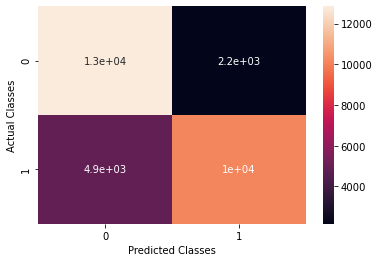

In [37]:
print("Confusion Matrix for KNN Model")
test_conf_mat_knn = confusion_matrix(test_y.tolist(),test_predicted_classes_knn)
print(test_conf_mat_knn)
sns.heatmap(test_conf_mat_knn,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [38]:
# accuracy_knn = accuracy_score(train_y,predicted_classes_knn)
# print(accuracy_knn)

test_accuracy_knn = accuracy_score(test_y,test_predicted_classes_knn)
precision_knn = precision_score(test_y,test_predicted_classes_knn)
recall_knn = recall_score(test_y,test_predicted_classes_knn)
F1_knn = f1_score(test_y,test_predicted_classes_knn)
print("accuracy score (KNN)", test_accuracy_knn)
print("Precision score (KNN)",precision_knn)
print("Recall score (KNN)", recall_knn)
print("F1 score (KNN)", F1_knn)
###########################################################################################

accuracy score (KNN) 0.7659666666666667
Precision score (KNN) 0.8242374949166328
Recall score (KNN) 0.6758703481392557
F1 score (KNN) 0.7427168456154494


In [39]:
#############SVC
model_svm = SVC(kernel = 'rbf', random_state = 0)
model_svm.fit(train_x, train_y)
    
test_predicted_classes_svm = model_svm.predict(test_x)

Confusion Matrix for SVM Model
[[13661  1345]
 [ 3570 11424]]


Text(33.0, 0.5, 'Actual Classes')

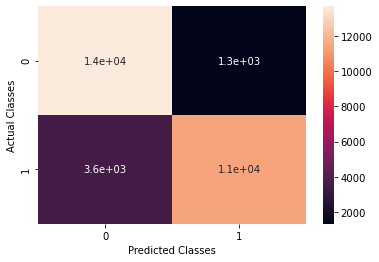

In [40]:
print("Confusion Matrix for SVM Model")
test_conf_mat_svm = confusion_matrix(test_y.tolist(),test_predicted_classes_svm)
print(test_conf_mat_svm)
sns.heatmap(test_conf_mat_svm,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [41]:
test_accuracy_svm = accuracy_score(test_y,test_predicted_classes_svm)
precision_svm = precision_score(test_y,test_predicted_classes_svm)
recall_svm = recall_score(test_y,test_predicted_classes_svm)
F1_svm = f1_score(test_y,test_predicted_classes_knn)
print("accuracy score (SVM)", test_accuracy_svm)
print("Precision score (SVM)",precision_svm)
print("Recall score (SVM)", recall_svm)
print("F1 score (SVM)", F1_svm)
###########################################################################################

accuracy score (SVM) 0.8361666666666666
Precision score (SVM) 0.8946667710862245
Recall score (SVM) 0.7619047619047619
F1 score (SVM) 0.7427168456154494


In [42]:
################Random Forest
model_rf_regressor = RandomForestClassifier(n_estimators = 100, random_state = 0)
model_rf_regressor.fit(train_x, train_y)


RandomForestClassifier(random_state=0)

In [43]:
test_predicted_classes_rf = model_rf_regressor.predict(test_x)

Confusion Matrix for Random Forest
[[13912  1094]
 [ 2380 12614]]


Text(33.0, 0.5, 'Actual Classes')

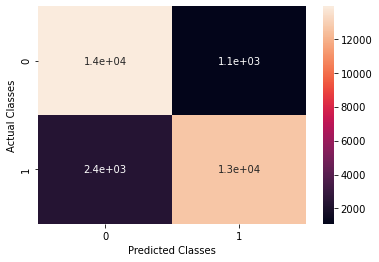

In [44]:
print("Confusion Matrix for Random Forest")
test_conf_mat_rf = confusion_matrix(test_y.tolist(),test_predicted_classes_rf)
print(test_conf_mat_rf)
sns.heatmap(test_conf_mat_rf,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [45]:
test_accuracy_rf = accuracy_score(test_y,test_predicted_classes_rf)
precision_rf = precision_score(test_y,test_predicted_classes_rf)
recall_rf = recall_score(test_y,test_predicted_classes_rf)
F1_rf = f1_score(test_y,test_predicted_classes_rf)
print("accuracy score (RF)", test_accuracy_rf)
print("Precision score (RF)",precision_rf)
print("Recall score (RF)", recall_rf)
print("F1 score (RF)", F1_rf)

accuracy score (RF) 0.8842
Precision score (RF) 0.9201925882696236
Recall score (RF) 0.8412698412698413
F1 score (RF) 0.8789631384572505


In [46]:
############XGBoost#######################
classifier=xgboost.XGBClassifier()

In [47]:
##Hyperparameter optimization for xgboost
params={
    "learning_rate":[0.5,0.10,0.15,0.20,0.25,0,30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [48]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [49]:
random_search.fit(train_x,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\sherine chally\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [50]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [52]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
classifier.fit(train_x,train_y)
test_predicted_classes_xg = classifier.predict(test_x)

[17:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Confusion Matrix for xgBoost Model
[[13303  1703]
 [ 1759 13235]]


Text(33.0, 0.5, 'Actual Classes')

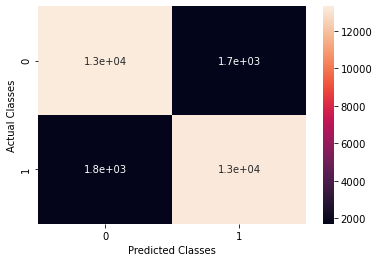

In [54]:
print("Confusion Matrix for xgBoost Model")
test_conf_mat_xgboost = confusion_matrix(test_y.tolist(),test_predicted_classes_xg)
print(test_conf_mat_xgboost)
sns.heatmap(test_conf_mat_xgboost,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [55]:
test_accuracy_xg = accuracy_score(test_y,test_predicted_classes_xg)
precision_xg = precision_score(test_y,test_predicted_classes_xg)
recall_xg = recall_score(test_y,test_predicted_classes_xg)
F1_xg = f1_score(test_y,test_predicted_classes_xg)
print("accuracy score (RF)", test_accuracy_xg)
print("Precision score (RF)",precision_xg)
print("Recall score (RF)", recall_xg)
print("F1 score (RF)", F1_xg)

accuracy score (RF) 0.8846
Precision score (RF) 0.885995447851118
Recall score (RF) 0.8826864078964919
F1 score (RF) 0.8843378324201523


In [56]:
from catboost import CatBoostClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [57]:
model_cb=CatBoostClassifier()

In [58]:
parameters={
    'depth':sp_randInt(4,10),
    'learning_rate':sp_randFloat(),
    'iterations':sp_randInt(10,100)
}

In [59]:
random_search_cb=RandomizedSearchCV(model_cb,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=2)

In [60]:
random_search_cb.fit(train_x,train_y)

0:	learn: 0.5459294	total: 243ms	remaining: 22.6s
1:	learn: 0.4809611	total: 372ms	remaining: 17.1s
2:	learn: 0.4463101	total: 486ms	remaining: 14.7s
3:	learn: 0.4116886	total: 1s	remaining: 22.6s
4:	learn: 0.3928788	total: 1.11s	remaining: 19.7s
5:	learn: 0.3844045	total: 1.21s	remaining: 17.8s
6:	learn: 0.3740244	total: 1.32s	remaining: 16.5s
7:	learn: 0.3680126	total: 1.42s	remaining: 15.2s
8:	learn: 0.3604159	total: 1.5s	remaining: 14.2s
9:	learn: 0.3568718	total: 1.6s	remaining: 13.4s
10:	learn: 0.3519110	total: 1.69s	remaining: 12.8s
11:	learn: 0.3468368	total: 1.78s	remaining: 12.2s
12:	learn: 0.3434068	total: 1.88s	remaining: 11.7s
13:	learn: 0.3372738	total: 1.98s	remaining: 11.3s
14:	learn: 0.3341476	total: 2.07s	remaining: 10.9s
15:	learn: 0.3313034	total: 2.17s	remaining: 10.6s
16:	learn: 0.3273881	total: 2.28s	remaining: 10.3s
17:	learn: 0.3230203	total: 2.39s	remaining: 10.1s
18:	learn: 0.3209038	total: 2.48s	remaining: 9.81s
19:	learn: 0.3158093	total: 2.57s	remaining: 9

RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000025F0E0EDCA0>,
                   n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025F0B9B9460>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025F0E0EDD00>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025F03BE3340>})

In [61]:
random_search_cb.best_estimator_

In [62]:
random_search_cb.best_params_

{'depth': 8, 'iterations': 94, 'learning_rate': 0.2539628593029074}

In [63]:
model_cb=CatBoostClassifier(depth= 5, iterations=75, learning_rate=0.476499500499995)

In [64]:
model_cb.fit(train_x,train_y)
test_predicted_classes_cb = model_cb.predict(test_x)

0:	learn: 0.4923089	total: 64.7ms	remaining: 4.78s
1:	learn: 0.4416921	total: 131ms	remaining: 4.79s
2:	learn: 0.4144015	total: 211ms	remaining: 5.05s
3:	learn: 0.4008097	total: 292ms	remaining: 5.18s
4:	learn: 0.3881466	total: 380ms	remaining: 5.32s
5:	learn: 0.3744940	total: 463ms	remaining: 5.33s
6:	learn: 0.3711707	total: 553ms	remaining: 5.37s
7:	learn: 0.3667289	total: 636ms	remaining: 5.32s
8:	learn: 0.3534923	total: 712ms	remaining: 5.22s
9:	learn: 0.3502979	total: 774ms	remaining: 5.03s
10:	learn: 0.3476882	total: 834ms	remaining: 4.86s
11:	learn: 0.3462467	total: 907ms	remaining: 4.76s
12:	learn: 0.3438676	total: 981ms	remaining: 4.68s
13:	learn: 0.3388873	total: 1.05s	remaining: 4.59s
14:	learn: 0.3361999	total: 1.13s	remaining: 4.54s
15:	learn: 0.3346301	total: 1.21s	remaining: 4.48s
16:	learn: 0.3318591	total: 1.3s	remaining: 4.44s
17:	learn: 0.3270289	total: 1.39s	remaining: 4.39s
18:	learn: 0.3233457	total: 1.47s	remaining: 4.32s
19:	learn: 0.3211296	total: 1.55s	remaini

Confusion Matrix for catBoost Model
[[13119  1887]
 [ 1730 13264]]


Text(33.0, 0.5, 'Actual Classes')

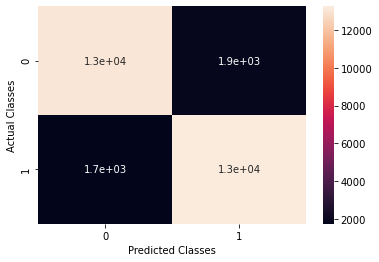

In [65]:
print("Confusion Matrix for catBoost Model")
test_conf_mat_cbboost = confusion_matrix(test_y.tolist(),test_predicted_classes_cb)
print(test_conf_mat_cbboost)
sns.heatmap(test_conf_mat_cbboost,annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [66]:
test_accuracy_cb = accuracy_score(test_y,test_predicted_classes_cb)
precision_cb = precision_score(test_y,test_predicted_classes_cb)
recall_cb = recall_score(test_y,test_predicted_classes_cb)
F1_cb = f1_score(test_y,test_predicted_classes_cb)
print("accuracy score (RF)", test_accuracy_cb)
print("Precision score (RF)",precision_cb)
print("Recall score (RF)", recall_cb)
print("F1 score (RF)", F1_cb)

accuracy score (RF) 0.8794333333333333
Precision score (RF) 0.8754537654280246
Recall score (RF) 0.8846205148726157
F1 score (RF) 0.8800132691988721


# test data prediction

In [4]:
#Preprocessing Steps done same as the training dataset
dataset=pd.read_csv('Assignment_Test_Data.csv')
dataset.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37
0,20692051,86.61,Mumbai - Corporate,N,33000,99.0,N,28.06642,11000000.0,EDM,...,2018-04-09,1,Resident Indian,37,1,N,Karnataka,EDM,11000000.0,NaN
1,19931311,NaN,Karnal - Narayan Plaza,N,99999,11.0,N,21.79931,999990.0,HDFC BANK,...,2017-12-30,0,Resident Indian,10,1,N,Haryana,HDFC BANK,1999980.0,North 1
2,19965894,NaN,Pune City Mall,N,60000,22.0,Y,21.30395,600000.0,HDFC BANK,...,2018-10-01,0,Resident Indian,10,1,N,Maharashtra,HDFC BANK,1200000.0,West
3,20976831,86.61,Mumbai - Corporate,N,6595,107.0,N,30.04082,5000000.0,EDM,...,2018-12-18,1,Resident Indian,50,1,N,Gujarat,EDM,5000000.0,NaN
4,20270101,0.9099,Mumbai - Corporate,Y,25323,64.0,N,24.93372,13180982.0,HDFC BANK,...,2018-03-31,1,Resident Indian,31,1,N,Karnataka,OL-HDFC BANK,11017014.0,NaN


In [5]:
dataset.isnull().sum()

VAR1         0
VAR2     16284
VAR3         0
VAR4     10660
VAR5         0
VAR6         0
VAR7         0
VAR8     10660
VAR9         7
VAR10       36
VAR11      914
VAR12      138
VAR13      914
VAR14        0
VAR15        0
VAR16        0
VAR17     1797
VAR18     1807
VAR19        0
VAR20        0
VAR21        7
VAR22        0
VAR23     9590
VAR24      597
VAR25        0
VAR26        0
VAR27        0
VAR28        0
VAR29        0
VAR30        0
VAR31        0
VAR32        0
VAR33    10660
VAR34      914
VAR35       36
VAR36        0
VAR37    10380
dtype: int64

In [6]:
#Dropping the Policy Identifier
dataset = dataset.drop(['VAR1'],axis=1)

In [7]:
dataset.dtypes

VAR2      object
VAR3      object
VAR4      object
VAR5       int64
VAR6     float64
VAR7      object
VAR8     float64
VAR9     float64
VAR10     object
VAR11     object
VAR12     object
VAR13     object
VAR14      int64
VAR15     object
VAR16     object
VAR17    float64
VAR18     object
VAR19     object
VAR20     object
VAR21     object
VAR22     object
VAR23     object
VAR24     object
VAR25     object
VAR26     object
VAR27     object
VAR28     object
VAR29      int64
VAR30     object
VAR31      int64
VAR32      int64
VAR33     object
VAR34     object
VAR35     object
VAR36    float64
VAR37     object
dtype: object

In [8]:
dataset["VAR2"] = pd.to_numeric(dataset["VAR2"],errors = "coerce")

C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VAR2', ylabel='Density'>

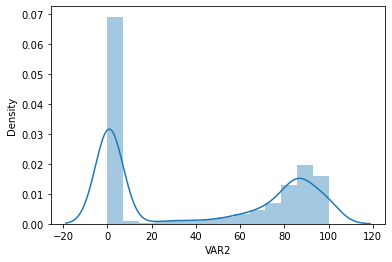

In [9]:
#distribution plot to see outliers
sns.distplot(dataset['VAR2'].dropna())

<AxesSubplot:>

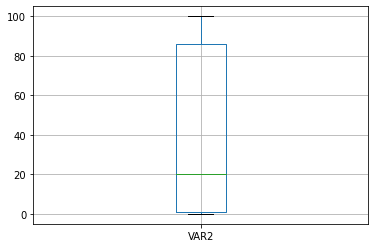

In [10]:
dataset.boxplot("VAR2")

In [11]:
dataset['VAR2'].describe()

count    13253.000000
mean        41.025196
std         41.791619
min          0.000000
25%          0.830700
50%         20.060000
75%         86.000000
max        100.000000
Name: VAR2, dtype: float64

In [12]:
dataset[dataset.VAR2.notnull()]

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,...,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37
0,86.6100,Mumbai - Corporate,N,33000,99.0,N,28.06642,11000000.0,EDM,bengaluru,...,2018-04-09,1,Resident Indian,37,1,N,Karnataka,EDM,11000000.0,NaN
3,86.6100,Mumbai - Corporate,N,6595,107.0,N,30.04082,5000000.0,EDM,vadodara,...,2018-12-18,1,Resident Indian,50,1,N,Gujarat,EDM,5000000.0,NaN
4,0.9099,Mumbai - Corporate,Y,25323,64.0,N,24.93372,13180982.0,HDFC BANK,Bangalore,...,2018-03-31,1,Resident Indian,31,1,N,Karnataka,OL-HDFC BANK,11017014.0,NaN
5,97.8800,Mumbai - Bandra Kurla Complex,NaN,12000,112.0,Y,NaN,0.0,Brokers & Small CA,thane,...,2018-12-22,0,Resident Indian,10,0,NaN,Maharashtra,Brokers,113200.0,West
10,0.8276,Bareilly - Chopla Road,NaN,50200,29.0,Y,NaN,210623.0,HDFC BANK,Bareilly,...,2018-03-22,0,Resident Indian,15,0,NaN,Uttar Pradesh,HDFC BANK,210623.0,North 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29983,0.9265,Lucknow - Aliganj,NaN,49864,39.0,Y,NaN,521080.0,Direct,Lucknow,...,2018-01-18,0,Resident Indian,12,0,NaN,Uttar Pradesh,Loyalty,320199.0,North 2
29984,0.8307,Mumbai - Corporate,N,33135,35.0,Y,17.91633,897270.0,HDFC BANK,Nandgaon,...,2018-04-27,0,Resident Indian,15,1,N,Maharashtra,HDFC BANK,281090.0,NaN
29986,93.8900,Pune - Law College,NaN,60000,37.0,Y,NaN,598450.0,Direct,NaN,...,2018-12-30,0,NRI,24,0,NaN,NaN,Loyalty,598450.0,West
29993,90.9800,Bhavnagar - Patni Plaza,N,50000,59.0,Y,24.80159,500000.0,Ex-HDFC,jetpur,...,2018-05-20,0,Resident Indian,10,0,N,Gujarat,HDFC Sec,500000.0,West


In [13]:
#replaced the values of Agent persistency from 0 to 1 and also filled na values with 0
for i in range(len(dataset)):
    if(dataset.VAR2[i]>1):
        dataset.VAR2[i]=dataset.VAR2[i]/100.0

<ipython-input-13-885a12e2afeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.VAR2[i]=dataset.VAR2[i]/100.0


In [14]:
dataset['VAR2']=dataset.VAR2.fillna(0)

In [15]:
dataset = dataset.drop(["VAR3"],axis=1)

In [16]:
dataset['VAR4'] = dataset.VAR4.fillna('No Response')

In [17]:
dataset = dataset.dropna(how='any', subset=['VAR5', 'VAR6'])

In [18]:
def impute_nan(df,variable):
    dataset[variable+"_random"]=dataset[variable]
    
    random_sample=dataset[variable].dropna().sample(dataset[variable].isnull().sum(),random_state=0)
    
    random_sample.index=dataset[dataset[variable].isnull()].index
    dataset.loc[dataset[variable].isnull(),variable+'_random']=random_sample

In [19]:
impute_nan(dataset,"VAR8")

In [20]:
dataset = dataset.drop(["VAR8"],axis = 1)

In [21]:
dataset=dataset.rename(columns = {'VAR8_random':'VAR8'})

In [22]:
dataset.isnull().sum()

VAR2         0
VAR4         0
VAR5         0
VAR6         0
VAR7         0
VAR9         7
VAR10       36
VAR11      914
VAR12      138
VAR13      914
VAR14        0
VAR15        0
VAR16        0
VAR17     1797
VAR18     1807
VAR19        0
VAR20        0
VAR21        7
VAR22        0
VAR23     9590
VAR24      597
VAR25        0
VAR26        0
VAR27        0
VAR28        0
VAR29        0
VAR30        0
VAR31        0
VAR32        0
VAR33    10660
VAR34      914
VAR35       36
VAR36        0
VAR37    10380
VAR8         0
dtype: int64

In [23]:
#Replaced null values of VAR 10 with highest frquency Category
dataset.VAR10.value_counts().sort_values(ascending=False)
dataset['VAR10'].mode()[0]

'HDFC BANK'

In [24]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [25]:
impute_nan(dataset,'VAR10')

In [26]:
dataset.isnull().sum()

VAR2         0
VAR4         0
VAR5         0
VAR6         0
VAR7         0
VAR9         7
VAR10        0
VAR11      914
VAR12      138
VAR13      914
VAR14        0
VAR15        0
VAR16        0
VAR17     1797
VAR18     1807
VAR19        0
VAR20        0
VAR21        7
VAR22        0
VAR23     9590
VAR24      597
VAR25        0
VAR26        0
VAR27        0
VAR28        0
VAR29        0
VAR30        0
VAR31        0
VAR32        0
VAR33    10660
VAR34      914
VAR35       36
VAR36        0
VAR37    10380
VAR8         0
dtype: int64

<AxesSubplot:>

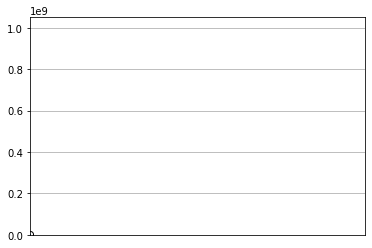

In [27]:
##VAR9 - Outliers are there - but need to reelook
dataset.boxplot("VAR9")
dataset.VAR9.hist(bins=50)

In [28]:
dataset = dataset.dropna(how='any', subset=['VAR9'])

dataset = dataset.drop(['VAR11'],axis=1)
dataset = dataset.drop(['VAR12'],axis=1)

In [29]:
def impute_nan(df,variable):
    dataset[variable+"_random"]=dataset[variable]
    
    random_sample=dataset[variable].dropna().sample(dataset[variable].isnull().sum(),random_state=0)
    
    random_sample.index=dataset[dataset[variable].isnull()].index
    dataset.loc[dataset[variable].isnull(),variable+'_random']=random_sample

In [30]:
impute_nan(dataset,"VAR13")
dataset = dataset.drop(["VAR13"],axis = 1)
dataset=dataset.rename(columns = {'VAR13_random':'VAR13'})

C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VAR14', ylabel='Density'>

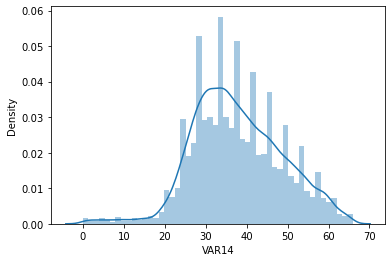

In [31]:
sns.distplot(dataset['VAR14'].dropna())

<AxesSubplot:>

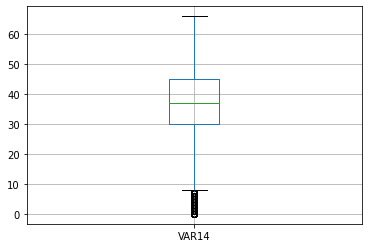

In [32]:
dataset.boxplot(column="VAR14")

In [33]:
dataset['VAR14'].describe()

count    29993.000000
mean        37.761378
std         10.939151
min          0.000000
25%         30.000000
50%         37.000000
75%         45.000000
max         66.000000
Name: VAR14, dtype: float64

In [34]:
uppper_boundary=dataset['VAR14'].mean() + 3* dataset['VAR14'].std()
lower_boundary=dataset['VAR14'].mean() - 3* dataset['VAR14'].std()
print(lower_boundary), print(uppper_boundary),print(dataset['VAR14'].mean())

4.943925742692315
70.57882956687992
37.761377654786116


(None, None, None)

<AxesSubplot:>

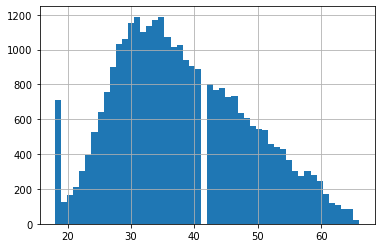

In [35]:
dataset.loc[dataset['VAR14']>=71,'VAR14']=71
dataset.loc[dataset['VAR14']<=18,'VAR14']=18
dataset.VAR14.hist(bins=50)

In [36]:
dataset["VAR18"]=dataset.VAR18.fillna("Not Disclosed")

In [37]:
temp=dataset.groupby('VAR18')['VAR17'].mean()
temp

VAR18
Accounts       7.349549e+05
Ad Agency      1.339145e+06
Advertising    1.712362e+06
Aeronautics    5.249091e+06
Agriculture    4.245830e+05
                   ...     
Wool           5.225000e+05
Yarn           4.440000e+05
e-Commerce     2.292492e+06
e-banking      1.866667e+05
e-finance      4.700000e+06
Name: VAR17, Length: 315, dtype: float64

In [38]:
find_set = dataset.VAR18.unique() 
find_set

array(['IT Industry', 'Accounts', 'Navy', 'Chemical', 'Consultant',
       'Food', 'Shipping', 'Doctor', 'Investment Banking', 'Banking',
       'Jewellery', 'Not Disclosed', 'Manufacturing', 'Stationary',
       'Beauty & Cosmetics', 'Business', 'Clothes', 'Furniture',
       'Service', 'Software', 'Education', 'Railways', 'Liquor',
       'Sericulture', 'Gold', 'Hospitality', 'Other',
       'Information Technology', 'Agriculture', 'Irrigation',
       'Government Sector', 'Sales', 'Medical', 'Mobile', 'Police',
       'Telecom', 'Catering', 'Trading', 'Taxation', 'Engineering',
       'State Government', 'Electronics', 'Interior Design', 'Apparels',
       'Textile', 'Banking & Finance', 'Sugar', 'Legal And Justice',
       'Advertising', 'Teaching', 'Electricals', 'Hospital',
       'Construction', 'School', 'Garments', 'Finance', 'Diamond',
       'Merchant Marine', 'Media', 'Cement', 'BPO', 'Animal Husbandry',
       'Retail', 'Dental', 'Sales And Marketing', 'Pharmaceutical',
  

In [39]:
for i in range(len(find_set)):
    a=str(find_set[i]).strip()
    #print(a)
    dataset.loc[(dataset['VAR18']== a) & (dataset['VAR17'].isna()==True),'VAR17']=temp[a]

<AxesSubplot:>

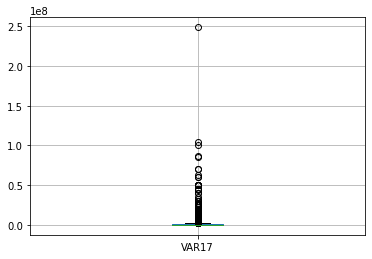

In [40]:
dataset.boxplot(column="VAR17")

In [41]:
for i in range(len(find_set)):
    a=str(find_set[i]).strip()
    #print(a)
    dataset.loc[(dataset['VAR18']== a) & (dataset['VAR17']<5000),'VAR17']=temp[a]

<AxesSubplot:>

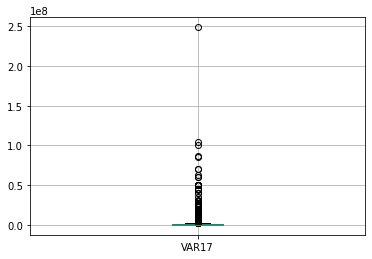

In [42]:
dataset.boxplot(column="VAR17")

In [43]:
dataset = dataset.drop(["VAR27"],axis = 1)

lst_7=dataset.VAR10.value_counts().sort_values(ascending=False).head(7).index
lst_7=list(lst_7)

In [44]:
for categories in lst_7:
    dataset[categories]=np.where(dataset['VAR10']==categories,1,0)

In [45]:
A = dataset['VAR15'].value_counts()

In [46]:
lst_10=dataset.VAR15.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)
for categories in lst_10:
    dataset[categories]=np.where(dataset['VAR15']==categories,1,0)

In [47]:
dataset["VAR33"]=dataset.VAR33.fillna("Not Disclosed") 

In [48]:

dataset['VAR24'].mode()[0]

'Cheque'

In [49]:
def impute_nan(df,variable): 
    most_frequent_category=df[variable].mode()[0] 
    df[variable].fillna(most_frequent_category,inplace=True) 
impute_nan(dataset,'VAR24')

<AxesSubplot:>

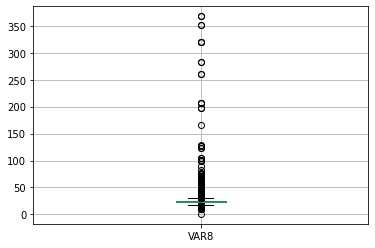

In [50]:
dataset['VAR5'].describe()
##Checking outliers
dataset.boxplot("VAR8")

In [51]:
import matplotlib.pyplot as plt
IQR=dataset.VAR8.quantile(0.75)-dataset.VAR8.quantile(0.25)
lower_bridge=dataset['VAR8'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset['VAR8'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
dataset.loc[dataset['VAR8']>=31,'VAR8']=31
dataset.loc[dataset['VAR8']<=17,'VAR8']=17

17.21571
30.80923


In [52]:
dataset.isnull().sum()
dataset.to_csv("check_test_new.csv")

In [53]:
dataset = dataset.drop(['VAR18'],axis=1)
dataset = dataset.drop(['VAR34'],axis=1)
dataset = dataset.drop(['VAR23','VAR37'],axis=1)
dataset = dataset.drop(['VAR28'],axis=1)
dataset = dataset.drop(['VAR10'],axis=1)
dataset = dataset.drop(['VAR15'],axis=1)
dataset = dataset.drop(['VAR35'],axis=1)

In [54]:
dataset.isnull().sum()

VAR2                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
VAR9                            0
VAR14                           0
VAR16                           0
VAR17                           0
VAR19                           0
VAR20                           0
VAR21                           0
VAR22                           0
VAR24                           0
VAR25                           0
VAR26                           0
VAR29                           0
VAR30                           0
VAR31                           0
VAR32                           0
VAR33                           0
VAR36                           0
VAR8                            0
VAR13                           0
HDFC BANK                       0
Agency                          0
EDM                             0
Direct                          0
Brokers & Small CA              0
Ex-HDFC       

In [55]:

dataset = pd.get_dummies( dataset,drop_first = True )

In [56]:
#feature Selection
X=dataset

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
a=X.columns
X_scaled=pd.DataFrame(X_scaled,columns = a)

In [59]:
X_new = X_scaled[['VAR2', 'VAR5', 'VAR6', 'VAR9', 'VAR14', 'VAR31', 'VAR32', 'VAR36',
       'VAR8', 'HDFC BANK', 'EDM', 'Brokers & Small CA', 'Direct',
       'Other Banks & CA', 'B A', 'Graduation', 'H S C', 'S S C',
       'Under Matric (Class l to lX)', 'MBA', 'B E', 'B Tech',
       'VAR4_No Response', 'VAR7_Y', 'VAR16_Male', 'VAR21_Others',
       'VAR21_Salaried', 'VAR21_Self employed/ Business', 'VAR21_Student',
       'VAR22_Par', 'VAR24_DD', 'VAR24_ECS,SI',
       'VAR24_Online Credit/Debit Card/Teles Sales', 'VAR24_Online Netbanking',
       'VAR25_Savings', 'VAR26_Halfyearly Premium', 'VAR26_Monthly Premium',
       'VAR13_Tier III','VAR17']]

In [60]:
X_new.isnull().sum()

VAR2                                          0
VAR5                                          0
VAR6                                          0
VAR9                                          0
VAR14                                         0
VAR31                                         0
VAR32                                         0
VAR36                                         0
VAR8                                          0
HDFC BANK                                     0
EDM                                           0
Brokers & Small CA                            0
Direct                                        0
Other Banks & CA                              0
B A                                           0
Graduation                                    0
H S C                                         0
S S C                                         0
Under Matric (Class l to lX)                  0
MBA                                           0
B E                                     

In [61]:
import pickle
with open('test_dataset.pkl', 'wb') as fv:
    pickle.dump(X_new, fv)

In [62]:
with open('x_res_obj.pkl', 'rb') as fv:
    X_res = pickle.load(fv)
with open('y_resobj.pkl', 'rb') as dfv:
    y_res = pickle.load(dfv)

with open('test_dataset.pkl', 'rb') as dfv1:
    test_data = pickle.load(dfv1)

In [63]:
X_res.value_counts()

VAR2       VAR5        VAR6       VAR9       VAR14      VAR31      VAR32      VAR36      VAR8       HDFC BANK  EDM        Brokers & Small CA  Direct     Other Banks & CA  B A        Graduation  H S C      S S C     Under Matric (Class l to lX)  MBA        B E        B Tech     VAR4_No Response  VAR7_Y     VAR16_Male  VAR21_Others  VAR21_Salaried  VAR21_Self employed/ Business  VAR21_Student  VAR22_Par  VAR24_DD   VAR24_ECS,SI  VAR24_Online Credit/Debit Card/Teles Sales  VAR24_Online Netbanking  VAR25_Savings  VAR26_Halfyearly Premium  VAR26_Monthly Premium  VAR13_Tier III  VAR17    
-0.660363  -0.092072    0.504743  -0.044605   1.142738  -1.155566  -0.908123  -0.289744   0.917632  -1.092717  -0.312669  -0.257555            4.008207  -0.188974         -0.436446  -0.376106   -0.301138  -0.29687  -0.265026                      4.184871  -0.224136  -0.201912  -0.732173         -1.010791   0.557435   -0.137386      1.029637       -0.792837                      -0.162955      -0.662751  -0.4

In [64]:
from sklearn.ensemble import GradientBoostingClassifier 

In [65]:
#########Gradient Boosting
## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)

In [66]:
## Fitting gradient boosting model to training set
gboost_clf.fit(X_res, y_res)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [67]:
predicted_classes_gboost = gboost_clf.predict(test_data)

In [68]:
predicted_test_data=pd.DataFrame(data=predicted_classes_gboost, columns=['predicted_value'])

In [69]:
predicted_test_data

,predicted_value
0,0
1,0
2,0
3,0
4,0
...,...
29988,0
29989,0
29990,0
29991,1


In [70]:
predicted_test_data.value_counts()

predicted_value
0                  27964
1                   2029
dtype: int64

In [71]:
predicted_test_data.to_csv("predicted_Test_data.csv")

In [72]:
index_names = predicted_test_data[ (predicted_test_data['predicted_value'] == 1)].index
index_names
predicted_test_data.drop(index_names, inplace = True)
predicted_test_data.predicted_value.value_counts()
dataset=pd.read_csv('Assignment_Test_Data.csv')
predicted_test_data['History_of_Complaint_yn'] = 0
predicted_test_data['Agent_yn'] = 0
predicted_test_data['Email_Subscription_yn']=0
predicted_test_data['Policies_More_Than_One_yn']=0
predicted_test_data['Benefits_Added_yn']=0
predicted_test_data
dataset.VAR24.value_counts()

Cheque                                  6693
Online Credit/Debit Card/Teles Sales    6398
Online-Bill                             6034
DD                                      5051
Journal Entry                           1846
Online Netbanking                       1706
ECS,SI                                  1527
Credit Card Mandate                      130
Cash                                      18
Name: VAR24, dtype: int64

In [73]:

for i in range(len(dataset)):
    if dataset.VAR24[i]=='Cheque'or dataset.VAR24[i]=='DD'or dataset.VAR24[i]=='Journal Entry'or dataset.VAR24[i]=='Cash':
        predicted_test_data.Email_Subscription_yn[i]=0
    else:
        predicted_test_data.Email_Subscription_yn[i]=1
predicted_test_data.Email_Subscription_yn.value_counts()
dataset.VAR9.value_counts()
dataset.VAR14.value_counts()
for i in range(len(dataset)):
    if dataset.VAR9[i]>=500000:
        predicted_test_data.Policies_More_Than_One_yn[i]=1
    else:
        predicted_test_data.Policies_More_Than_One_yn[i]=0
predicted_test_data.Policies_More_Than_One_yn.value_counts()
dataset.VAR21.value_counts()
dataset.VAR29.value_counts()
for i in range(len(dataset)):
    if dataset.VAR32[i]==1 and dataset.VAR21[i]!='Salaried' and dataset.VAR21[i]!='Self employed/ Business':
        predicted_test_data.Benefits_Added_yn[i]=1
    else:
        predicted_test_data.Benefits_Added_yn[i]=0
predicted_test_data.Benefits_Added_yn.value_counts()
for i in range(len(dataset)):
    if dataset.VAR29[i]==1:
        predicted_test_data.History_of_Complaint_yn[i]=1
    else:
        predicted_test_data.History_of_Complaint_yn[i]=0
dataset.VAR10.value_counts()
for i in range(len(dataset)):
    if dataset.VAR10[i]=='Agency':
        predicted_test_data.Agent_yn[i]=1
    else:
        predicted_test_data.Agent_yn[i]=0
predicted_test_data.Agent_yn.value_counts()
predicted_test_data.History_of_Complaint_yn.value_counts()
predicted_test_data
predicted_test_data.to_csv("predicted_data(uplift).csv")

# Method 1:Uplift Modeling

reference: https://github.com/PGuti/Uplift

In [48]:
##adding new columns

In [90]:
dataset=pd.read_csv('predicted_data(uplift).csv')

In [91]:
dataset.head()

,Unnamed: 0,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn
0,0,0,1,0,1,1,0
1,1,0,0,0,0,1,0
2,2,0,0,0,0,1,0
3,3,0,1,0,1,1,0
4,4,0,1,0,1,1,0


In [92]:
dataset

,Unnamed: 0,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn
0,0,0,1,0,1,1,0
1,1,0,0,0,0,1,0
2,2,0,0,0,0,1,0
3,3,0,1,0,1,1,0
4,4,0,1,0,1,1,0
...,...,...,...,...,...,...,...
27959,29987,0,0,1,0,0,0
27960,29988,0,1,1,1,1,0
27961,29989,0,1,0,1,1,0
27962,29990,0,0,0,1,1,0


Making a new dataset with new columns such as 'history of complaint', 'policies more than one', 'agent', 'email subscription','benefits added','customer type','treatment_control'.
All of which are having binary values.

In [93]:
dataset.rename( columns={'Unnamed: 0':'Index'}, inplace=True )
dataset.drop('Index', inplace=True, axis=1)

In [94]:
dataset.head()

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn
0,0,1,0,1,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,1,0,1,1,0
4,0,1,0,1,1,0


In [95]:
dataset=dataset.reset_index(drop=True)

In [96]:
dataset

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn
0,0,1,0,1,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,1,0,1,1,0
4,0,1,0,1,1,0
...,...,...,...,...,...,...
27959,0,0,1,0,0,0
27960,0,1,1,1,1,0
27961,0,1,0,1,1,0
27962,0,0,0,1,1,0


In [97]:
dataset['Customer_type'] = np.random.randint(0, 2, dataset.shape[0])

In [98]:
dataset.History_of_Complaint_yn.value_counts()

0    23896
1     4068
Name: History_of_Complaint_yn, dtype: int64

Customer type is then categorized to sleeping dogs,persuabdables,lost causes and sure things.

In [99]:

for i in range(len(dataset)):
    if dataset.History_of_Complaint_yn[i]==0:
        if dataset.Policies_More_Than_One_yn[i]==1 or dataset.Benefits_Added_yn[i]==1:
            dataset.Customer_type[i]='Persuadables'
        else:
            dataset.Customer_type[i]='Sure_Things'  
    else:
        if dataset.Agent_yn[i]==1 or dataset.Email_Subscription_yn[i]==1:
            dataset.Customer_type[i]='Sleeping_Dogs'
        else:
            dataset.Customer_type[i]='Lost_Causes'

<ipython-input-99-8bf9a3d04916>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Customer_type[i]='Sleeping_Dogs'
C:\Users\sherine chally\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [100]:
dataset.head()

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn,Customer_type
0,0,1,0,1,1,0,Sleeping_Dogs
1,0,0,0,0,1,0,Persuadables
2,0,0,0,0,1,0,Persuadables
3,0,1,0,1,1,0,Sleeping_Dogs
4,0,1,0,1,1,0,Sleeping_Dogs


In [101]:
dataset.Customer_type.value_counts()

Sure_Things      13074
Persuadables     10822
Sleeping_Dogs     3357
Lost_Causes        711
Name: Customer_type, dtype: int64

->A lost cause is a person that will react negatively no matter what (targeted by action or not). Targeting these people is a waste of resources.

->A sleeping dog is a person that will react negatively if he is treated but not if he is left alone.Targeting these people is bad for business.


->A persuadable is a person that react positively to a solicitation but would have reacted negatively if not. This is the persons we want to target with the uplift model.


->sure_thing is a person that would react positively no matter what. Targeting these people is a waste of resources.

In [102]:
dataset['Treatment_control']=0

In [103]:
import random

dataset['Treatment_control']=dataset.Treatment_control.apply(lambda x: random.choice(['Treatment','Control']))


In [104]:
dataset.head()

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn,Customer_type,Treatment_control
0,0,1,0,1,1,0,Sleeping_Dogs,Treatment
1,0,0,0,0,1,0,Persuadables,Treatment
2,0,0,0,0,1,0,Persuadables,Control
3,0,1,0,1,1,0,Sleeping_Dogs,Treatment
4,0,1,0,1,1,0,Sleeping_Dogs,Control


In [105]:
dataset.Treatment_control.value_counts()

Treatment    14010
Control      13954
Name: Treatment_control, dtype: int64

A new column is created to catergorize into treatment and control groups.

Each line represent a customer that can be either in treatment or control set. Treated person were exposed to some actions. On the contrary persons from control dataset were let alone

A new column is created called 'Outcome' and the result of which depends upon the 'customer_type' and the 'treatment_control' group.

In [106]:
dataset['Outcome'] = np.random.randint(0, 2, dataset.shape[0])

In [107]:
for i in range(len(dataset)):
    if(dataset.Customer_type[i]=='Sleeping_Dogs'and dataset.Treatment_control[i]=='Control'):
        dataset.Outcome[i]=1
    elif(dataset.Customer_type[i]=='Sleeping_Dogs' and dataset.Treatment_control[i]=='Treatment'):
        dataset.Outcome[i]=0
    elif(dataset.Customer_type[i]=='Lost_Causes' ):#and (dataset.Treatment_control[i]=='Control' or dataset.Treatment_control[i]=='Treatment')):
        dataset.Outcome[i]=0
    elif(dataset.Customer_type[i]=='Sure_Things'):# and dataset.Treatment_control[i]=='Control' or dataset.Treatment_control[i]=='Treatment'):
        dataset.Outcome[i]=1
    elif(dataset.Customer_type[i]=='Persuadables'and dataset.Treatment_control[i]=='Control'):
        dataset.Outcome[i]=0
    elif(dataset.Customer_type[i]=='Persuadables'and dataset.Treatment_control[i]=='Treatment'):
        dataset.Outcome[i]=1

<ipython-input-107-8c5c8459c749>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Outcome[i]=0
<ipython-input-107-8c5c8459c749>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Outcome[i]=1
<ipython-input-107-8c5c8459c749>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Outcome[i]=0
<ipython-input-107-8c5c8459c749>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [108]:
dataset

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn,Customer_type,Treatment_control,Outcome
0,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0
1,0,0,0,0,1,0,Persuadables,Treatment,1
2,0,0,0,0,1,0,Persuadables,Control,0
3,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0
4,0,1,0,1,1,0,Sleeping_Dogs,Control,1
...,...,...,...,...,...,...,...,...,...
27959,0,0,1,0,0,0,Sure_Things,Treatment,1
27960,0,1,1,1,1,0,Sleeping_Dogs,Treatment,0
27961,0,1,0,1,1,0,Sleeping_Dogs,Control,1
27962,0,0,0,1,1,0,Persuadables,Control,0


In [109]:
dataset.Outcome.value_counts()

1    20195
0     7769
Name: Outcome, dtype: int64

In [110]:
dataset

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn,Customer_type,Treatment_control,Outcome
0,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0
1,0,0,0,0,1,0,Persuadables,Treatment,1
2,0,0,0,0,1,0,Persuadables,Control,0
3,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0
4,0,1,0,1,1,0,Sleeping_Dogs,Control,1
...,...,...,...,...,...,...,...,...,...
27959,0,0,1,0,0,0,Sure_Things,Treatment,1
27960,0,1,1,1,1,0,Sleeping_Dogs,Treatment,0
27961,0,1,0,1,1,0,Sleeping_Dogs,Control,1
27962,0,0,0,1,1,0,Persuadables,Control,0


splitting dataset into train and test.The ratio is 80:20.

In [111]:
dataset['train_test'] = np.random.randint(0, 2, dataset.shape[0])

In [112]:
dataset = dataset.assign(train_test='test')

In [113]:
dataset.head(int(len(dataset)*(80/100)))

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn,Customer_type,Treatment_control,Outcome,train_test
0,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0,test
1,0,0,0,0,1,0,Persuadables,Treatment,1,test
2,0,0,0,0,1,0,Persuadables,Control,0,test
3,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0,test
4,0,1,0,1,1,0,Sleeping_Dogs,Control,1,test
...,...,...,...,...,...,...,...,...,...,...
22366,0,0,0,0,0,0,Sure_Things,Control,1,test
22367,0,0,0,0,1,0,Persuadables,Treatment,1,test
22368,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0,test
22369,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0,test


In [114]:
for i in range(int(len(dataset)*(80/100))):
    dataset.train_test[i]='train'

<ipython-input-114-63cf3f3a96fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.train_test[i]='train'


In [115]:
dataset.head(int(len(dataset)))

,predicted_value,History_of_Complaint_yn,Agent_yn,Email_Subscription_yn,Policies_More_Than_One_yn,Benefits_Added_yn,Customer_type,Treatment_control,Outcome,train_test
0,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0,train
1,0,0,0,0,1,0,Persuadables,Treatment,1,train
2,0,0,0,0,1,0,Persuadables,Control,0,train
3,0,1,0,1,1,0,Sleeping_Dogs,Treatment,0,train
4,0,1,0,1,1,0,Sleeping_Dogs,Control,1,train
...,...,...,...,...,...,...,...,...,...,...
27959,0,0,1,0,0,0,Sure_Things,Treatment,1,test
27960,0,1,1,1,1,0,Sleeping_Dogs,Treatment,0,test
27961,0,1,0,1,1,0,Sleeping_Dogs,Control,1,test
27962,0,0,0,1,1,0,Persuadables,Control,0,test


In [116]:

dataset.train_test.value_counts()

train    22371
test      5593
Name: train_test, dtype: int64

# Reshaping

In [117]:
#creating dummy variables for just the features
# dummify
feat = [x  for x in dataset.columns if '_yn'in x]
features = []
for f in feat : 
    dummies = pd.get_dummies(dataset[f]).rename(columns=lambda x: f + "_" + str(x))
    features = features + list(dummies.columns)
    dataset = pd.concat([dataset, dummies], axis=1)
    dataset = dataset.drop([f], axis=1)
    print("done", f)

done History_of_Complaint_yn
done Agent_yn
done Email_Subscription_yn
done Policies_More_Than_One_yn
done Benefits_Added_yn


In [118]:
features

['History_of_Complaint_yn_0',
 'History_of_Complaint_yn_1',
 'Agent_yn_0',
 'Agent_yn_1',
 'Email_Subscription_yn_0',
 'Email_Subscription_yn_1',
 'Policies_More_Than_One_yn_0',
 'Policies_More_Than_One_yn_1',
 'Benefits_Added_yn_0',
 'Benefits_Added_yn_1']

In [119]:
#modified by creating dummy variables
dataset

,predicted_value,Customer_type,Treatment_control,Outcome,train_test,History_of_Complaint_yn_0,History_of_Complaint_yn_1,Agent_yn_0,Agent_yn_1,Email_Subscription_yn_0,Email_Subscription_yn_1,Policies_More_Than_One_yn_0,Policies_More_Than_One_yn_1,Benefits_Added_yn_0,Benefits_Added_yn_1
0,0,Sleeping_Dogs,Treatment,0,train,0,1,1,0,0,1,0,1,1,0
1,0,Persuadables,Treatment,1,train,1,0,1,0,1,0,0,1,1,0
2,0,Persuadables,Control,0,train,1,0,1,0,1,0,0,1,1,0
3,0,Sleeping_Dogs,Treatment,0,train,0,1,1,0,0,1,0,1,1,0
4,0,Sleeping_Dogs,Control,1,train,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27959,0,Sure_Things,Treatment,1,test,1,0,0,1,1,0,1,0,1,0
27960,0,Sleeping_Dogs,Treatment,0,test,0,1,0,1,0,1,0,1,1,0
27961,0,Sleeping_Dogs,Control,1,test,0,1,1,0,0,1,0,1,1,0
27962,0,Persuadables,Control,0,test,1,0,1,0,0,1,0,1,1,0


In [120]:
dataset[features]

,History_of_Complaint_yn_0,History_of_Complaint_yn_1,Agent_yn_0,Agent_yn_1,Email_Subscription_yn_0,Email_Subscription_yn_1,Policies_More_Than_One_yn_0,Policies_More_Than_One_yn_1,Benefits_Added_yn_0,Benefits_Added_yn_1
0,0,1,1,0,0,1,0,1,1,0
1,1,0,1,0,1,0,0,1,1,0
2,1,0,1,0,1,0,0,1,1,0
3,0,1,1,0,0,1,0,1,1,0
4,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
27959,1,0,0,1,1,0,1,0,1,0
27960,0,1,0,1,0,1,0,1,1,0
27961,0,1,1,0,0,1,0,1,1,0
27962,1,0,1,0,0,1,0,1,1,0


In [121]:
##divided the dataset into 80:20 train and test data

train_df = dataset[dataset["train_test"]=="train"] 
test_df = dataset[dataset["train_test"]=="test"] 

print(train_df.shape)
print(test_df.shape)

(22371, 15)
(5593, 15)


In [122]:
dataset.to_csv("predictions_modified.csv")

In [123]:
#randomly sorted the train anad test variables in the excel file 

In [124]:
dataset=pd.read_csv('predictions_modified.csv')

In [125]:
dataset.head()

,Unnamed: 0,predicted_value,Customer_type,Treatment_control,Outcome,train_test,History_of_Complaint_yn_0,History_of_Complaint_yn_1,Agent_yn_0,Agent_yn_1,Email_Subscription_yn_0,Email_Subscription_yn_1,Policies_More_Than_One_yn_0,Policies_More_Than_One_yn_1,Benefits_Added_yn_0,Benefits_Added_yn_1
0,0,0,Sleeping_Dogs,Treatment,0,train,0,1,1,0,0,1,0,1,1,0
1,1,0,Persuadables,Treatment,1,train,1,0,1,0,1,0,0,1,1,0
2,2,0,Persuadables,Control,0,train,1,0,1,0,1,0,0,1,1,0
3,3,0,Sleeping_Dogs,Treatment,0,train,0,1,1,0,0,1,0,1,1,0
4,4,0,Sleeping_Dogs,Control,1,train,0,1,1,0,0,1,0,1,1,0


# Two model approach

we model uplift by the difference between probability of outcome in target dataset minus the probability of outcome in control dataset

In [126]:
treatment = train_df[train_df["Treatment_control"]=='Treatment']  
control = train_df[train_df["Treatment_control"]=='Control']

print(treatment.shape)
print(control.shape)

(11230, 15)
(11141, 15)


In [127]:
treatment_X = treatment[features]
control_X = control[features]
treatment_Y = treatment[['Outcome']]
control_Y = control[['Outcome']]
test_X = test_df[features]

In [128]:
features

['History_of_Complaint_yn_0',
 'History_of_Complaint_yn_1',
 'Agent_yn_0',
 'Agent_yn_1',
 'Email_Subscription_yn_0',
 'Email_Subscription_yn_1',
 'Policies_More_Than_One_yn_0',
 'Policies_More_Than_One_yn_1',
 'Benefits_Added_yn_0',
 'Benefits_Added_yn_1']

Training

In [129]:
clf1 = GradientBoostingClassifier(learning_rate = 0.1,max_depth=10, n_estimators=500)
clf2 = GradientBoostingClassifier(learning_rate = 0.1,max_depth=10, n_estimators=500)

In [130]:
clf1.fit(treatment_X.values,treatment_Y.values.ravel())
clf2.fit(control_X.values,control_Y.values.ravel())

GradientBoostingClassifier(max_depth=10, n_estimators=500)

scoring

In [131]:
#test_df["proba_outcome_treatment"]= clf1.predict(test_X)
test_df["proba_outcome_treatment"] = clf1.predict_proba(test_X)[:,1]
#test_df["proba_outcome_control"] = clf2.predict(test_X)
test_df["proba_outcome_control"] = clf2.predict_proba(test_X)[:,1]
# uplift is just the difference. 
test_df["uplift_1"] = test_df["proba_outcome_treatment"] - test_df["proba_outcome_control"]

<ipython-input-131-d3b661a8b86a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["proba_outcome_treatment"] = clf1.predict_proba(test_X)[:,1]
<ipython-input-131-d3b661a8b86a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["proba_outcome_control"] = clf2.predict_proba(test_X)[:,1]
<ipython-input-131-d3b661a8b86a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [132]:
test_df["uplift_1"]

22371    0.0
22372    1.0
22373   -1.0
22374    0.0
22375    0.0
        ... 
27959    0.0
27960   -1.0
27961   -1.0
27962    1.0
27963    0.0
Name: uplift_1, Length: 5593, dtype: float64

In [133]:
test_df["proba_outcome_treatment"]

22371    1.000000e+00
22372    1.000000e+00
22373    1.480592e-22
22374    1.000000e+00
22375    1.000000e+00
             ...     
27959    1.000000e+00
27960    1.480592e-22
27961    1.480592e-22
27962    1.000000e+00
27963    1.000000e+00
Name: proba_outcome_treatment, Length: 5593, dtype: float64

In [134]:
test_df["proba_outcome_control"]

22371    1.000000e+00
22372    1.091421e-22
22373    1.000000e+00
22374    1.000000e+00
22375    1.000000e+00
             ...     
27959    1.000000e+00
27960    1.000000e+00
27961    1.000000e+00
27962    1.091421e-22
27963    1.000000e+00
Name: proba_outcome_control, Length: 5593, dtype: float64

# Class Modification approach


this implement the class modification approach:

->stack the target and control data

->flip the target for the control dataset

->train a model on this target

->Uplift is 2 times predicted probabilities minus 1

In [135]:
####class modification approach(using random forest)

train_df['istreatment'] = train_df['Treatment_control'].map(lambda x : 1 if x=='Treatment' else 0)
train_df['modified_outcome'] = train_df['Outcome'] * train_df['istreatment']+ (1-train_df['Outcome'])*(1-train_df['istreatment'])

<ipython-input-135-46814015ed1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['istreatment'] = train_df['Treatment_control'].map(lambda x : 1 if x=='Treatment' else 0)
<ipython-input-135-46814015ed1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['modified_outcome'] = train_df['Outcome'] * train_df['istreatment']+ (1-train_df['Outcome'])*(1-train_df['istreatment'])


In [136]:
train_df['istreatment']

0        1
1        1
2        0
3        1
4        0
        ..
22366    0
22367    1
22368    1
22369    1
22370    1
Name: istreatment, Length: 22371, dtype: int64

In [137]:
train_df['modified_outcome']

0        0
1        1
2        1
3        0
4        0
        ..
22366    0
22367    1
22368    0
22369    0
22370    1
Name: modified_outcome, Length: 22371, dtype: int64

In [138]:
random_forest_clf = RandomForestClassifier(n_estimators = 500,max_depth=10)

In [139]:
random_forest_clf.fit(train_df[features].values, train_df['modified_outcome'].values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=500)

In [140]:
test_df["uplift_2"] = 2*random_forest_clf.predict_proba(test_X)[:,1] -1

<ipython-input-140-d891fb36b361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["uplift_2"] = 2*random_forest_clf.predict_proba(test_X)[:,1] -1


In [141]:
test_df["uplift_2"]

22371    0.013823
22372    1.000000
22373   -1.000000
22374   -0.025185
22375   -0.025185
           ...   
27959    0.022065
27960   -1.000000
27961   -1.000000
27962    1.000000
27963    0.013823
Name: uplift_2, Length: 5593, dtype: float64

In [142]:
test_df.to_csv("uplift_predictions.csv")

# Model Evaluation and Comparison

->First, we will calculate the uplift values and look at the distribution

->Then, we'll have a look at the predicted uplift compared to the customer type latent variable

->Finally we'll compare the two approchaes

     *by looking at the uplift per decile of the population targeted
    
     *by comparing their qini curves

# Predictions Distributions

# Two models approach

Text(0.5, 0.98, 'Predicted probability in treatment and control')

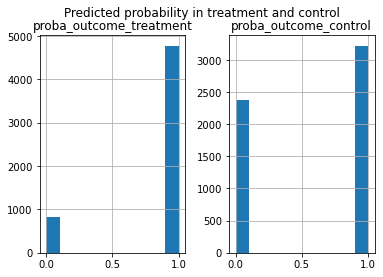

In [143]:
test_df[["proba_outcome_treatment","proba_outcome_control"]].hist()
plt.suptitle("Predicted probability in treatment and control")

To calculate the uplift we just calculate the differences between the two probabilities.

In [144]:
test_df["uplift_1"] = test_df['proba_outcome_treatment'] - test_df['proba_outcome_control']

<ipython-input-144-41e17f4bc6e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["uplift_1"] = test_df['proba_outcome_treatment'] - test_df['proba_outcome_control']


<AxesSubplot:title={'center':'Predicted uplift distribution(uplift1)'}>

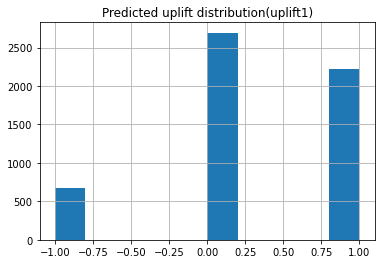

In [145]:
plt.title("Predicted uplift distribution(uplift1)")
test_df["uplift_1"].hist()

# Class Modification approach

<AxesSubplot:title={'center':'Predicted uplift distribution(uplift2)'}>

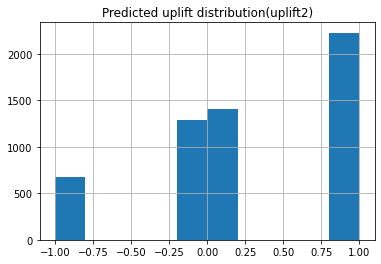

In [146]:
plt.title("Predicted uplift distribution(uplift2)")
test_df["uplift_2"].hist()

# Model Evaluation

A perfect model would have :

->uplift of 1 for persuadable

->uplift of -1 for sleeping_dog

->uplift of 0 for sure_thing and lost_cause (treatment has no effect)

In [147]:
test_df.groupby("Customer_type")[["uplift_1","uplift_2"]].mean()

,uplift_1,uplift_2
Customer_type,,
Lost_Causes,3.891708e-23,0.038138
Persuadables,1.000000e+00,1.000000
Sleeping_Dogs,-1.000000e+00,-1.000000
Sure_Things,0.000000e+00,-0.003125


Visualizing with seaborn voilin chart

In [148]:
tmp1 = test_df[["Customer_type","uplift_1"]]
tmp1.columns = ["Customer_type",'uplift']
tmp1["model"] = "two_models"

tmp2 = test_df[["Customer_type","uplift_2"]]
tmp2.columns = ["Customer_type",'uplift']
tmp2["model"] = "outcome_modification"

tmp = pd.concat([tmp1,tmp2],axis=0)

<ipython-input-148-d88df6768254>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1["model"] = "two_models"
<ipython-input-148-d88df6768254>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2["model"] = "outcome_modification"


In [149]:
tmp1

,Customer_type,uplift,model
22371,Sure_Things,0.0,two_models
22372,Persuadables,1.0,two_models
22373,Sleeping_Dogs,-1.0,two_models
22374,Sure_Things,0.0,two_models
22375,Sure_Things,0.0,two_models
...,...,...,...
27959,Sure_Things,0.0,two_models
27960,Sleeping_Dogs,-1.0,two_models
27961,Sleeping_Dogs,-1.0,two_models
27962,Persuadables,1.0,two_models


In [150]:
tmp2

,Customer_type,uplift,model
22371,Sure_Things,0.013823,outcome_modification
22372,Persuadables,1.000000,outcome_modification
22373,Sleeping_Dogs,-1.000000,outcome_modification
22374,Sure_Things,-0.025185,outcome_modification
22375,Sure_Things,-0.025185,outcome_modification
...,...,...,...
27959,Sure_Things,0.022065,outcome_modification
27960,Sleeping_Dogs,-1.000000,outcome_modification
27961,Sleeping_Dogs,-1.000000,outcome_modification
27962,Persuadables,1.000000,outcome_modification


In [151]:
tmp

,Customer_type,uplift,model
22371,Sure_Things,0.000000,two_models
22372,Persuadables,1.000000,two_models
22373,Sleeping_Dogs,-1.000000,two_models
22374,Sure_Things,0.000000,two_models
22375,Sure_Things,0.000000,two_models
...,...,...,...
27959,Sure_Things,0.022065,outcome_modification
27960,Sleeping_Dogs,-1.000000,outcome_modification
27961,Sleeping_Dogs,-1.000000,outcome_modification
27962,Persuadables,1.000000,outcome_modification


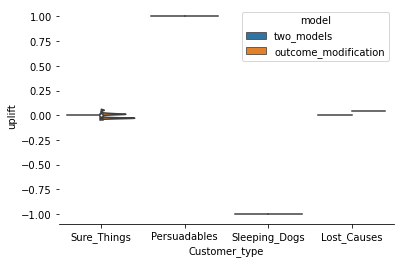

In [152]:
sns.violinplot(x="Customer_type", y="uplift",hue="model", data=tmp, split = True) 
sns.despine(left=True)

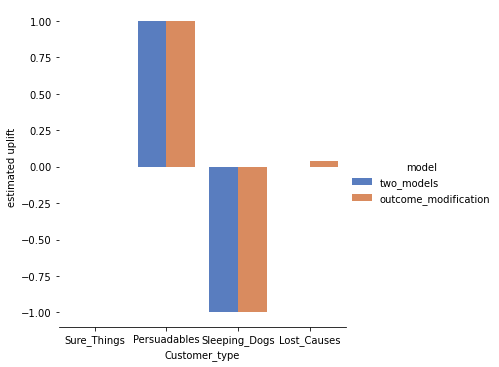

In [153]:

g = sns.catplot(x="Customer_type", y="uplift", hue="model", data=tmp,
                   kind="bar",palette="muted")
g.despine(left=True)
g.set_ylabels("estimated uplift")

Both two model and class modification approach are good giving uplift 1 for persuadables and -1 for sleeping dogs

# Uplift Evaluation

Uplift per decile

-> Here we evaluate the predicted uplift with the actual uplift.Since we cannot calculate the actual uplift for each customer,we calculate the actual uplift over a group of customers.For this, we rank the customers in the test dataset according to their predicted uplift, and partition them into deciles. 

In [154]:
#Uplit Evaulation
#Uplift per decile
test_df['is_treatment'] = test_df['Treatment_control'].map(lambda x : 1 if x == 'Treatment' else 0)
test_df['perfect'] = test_df['Outcome'] * test_df['is_treatment'] -  test_df['Outcome'] * (1-test_df['is_treatment'])

<ipython-input-154-12939a03e51f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['is_treatment'] = test_df['Treatment_control'].map(lambda x : 1 if x == 'Treatment' else 0)
<ipython-input-154-12939a03e51f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['perfect'] = test_df['Outcome'] * test_df['is_treatment'] -  test_df['Outcome'] * (1-test_df['is_treatment'])


In [155]:
test_df['Outcome'].value_counts()

1    3989
0    1604
Name: Outcome, dtype: int64

In [156]:
test_df['perfect']

22371    1
22372    1
22373   -1
22374   -1
22375   -1
        ..
27959    1
27960    0
27961   -1
27962    0
27963    1
Name: perfect, Length: 5593, dtype: int64

In [157]:
test_df['is_treatment']

22371    1
22372    1
22373    0
22374    0
22375    0
        ..
27959    1
27960    1
27961    0
27962    0
27963    1
Name: is_treatment, Length: 5593, dtype: int64

In [158]:

def get_hist(mydf, upliftcol,treatmentcol,outcomecol,p = 10):
    """ calucate the uplift for each decile given an uplift prediction column
    """
    control = mydf[mydf[treatmentcol]==0]
    treatment = mydf[mydf[treatmentcol]==1]
    control.sort_values(upliftcol)
    treatment.sort_values(upliftcol)
    control["percentile"] =  np.floor(control[upliftcol].rank(method='first',ascending = False) / (control.shape[0]+1) * p)
    treatment["percentile"] =  np.floor(treatment[upliftcol].rank(method='first',ascending = False) / (treatment.shape[0]+1) * p)
    control = (control.groupby(["percentile"])[outcomecol].mean()).reset_index()
    control.columns = ["percentile", 'prob_control']
    treatment = (treatment.groupby(["percentile"])[outcomecol].mean()).reset_index()
    treatment.columns = ["percentile", 'prob_target']
    final = pd.merge(control,treatment, on = "percentile")
    final["uplift"] = final["prob_target"] - final["prob_control"]
    return final

Using two models approach

In [159]:
hist_twomod = get_hist(test_df, "uplift_1","is_treatment","Outcome")

<ipython-input-158-a5f5a30b2867>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control["percentile"] =  np.floor(control[upliftcol].rank(method='first',ascending = False) / (control.shape[0]+1) * p)
<ipython-input-158-a5f5a30b2867>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment["percentile"] =  np.floor(treatment[upliftcol].rank(method='first',ascending = False) / (treatment.shape[0]+1) * p)


In [160]:
hist_twomod

,percentile,prob_control,prob_target,uplift
0,0.0,0.000000,1.000000,1.000000
1,1.0,0.000000,1.000000,1.000000
2,2.0,0.000000,1.000000,1.000000
3,3.0,0.000000,0.974820,0.974820
4,4.0,0.733096,0.780576,0.047479
5,5.0,1.000000,1.000000,0.000000
6,6.0,1.000000,1.000000,0.000000
7,7.0,1.000000,1.000000,0.000000
8,8.0,1.000000,0.791367,-0.208633
9,9.0,1.000000,0.000000,-1.000000


C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


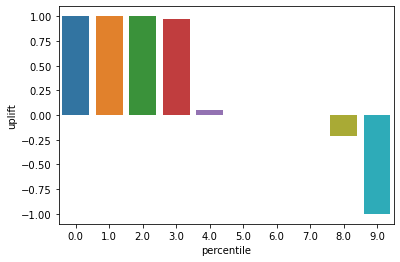

In [161]:
ax = sns.barplot(hist_twomod["percentile"],hist_twomod["uplift"])

We can reduce churn by 100% in the first decile.

Using class modification approach:-

In [162]:
hist_twomod = get_hist(test_df, "uplift_2","is_treatment","Outcome")
hist_twomod

<ipython-input-158-a5f5a30b2867>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control["percentile"] =  np.floor(control[upliftcol].rank(method='first',ascending = False) / (control.shape[0]+1) * p)
<ipython-input-158-a5f5a30b2867>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment["percentile"] =  np.floor(treatment[upliftcol].rank(method='first',ascending = False) / (treatment.shape[0]+1) * p)


,percentile,prob_control,prob_target,uplift
0,0.0,0.000000,1.000000,1.000000
1,1.0,0.000000,1.000000,1.000000
2,2.0,0.000000,1.000000,1.000000
3,3.0,0.010676,1.000000,0.989324
4,4.0,0.722420,0.755396,0.032976
5,5.0,1.000000,1.000000,0.000000
6,6.0,1.000000,1.000000,0.000000
7,7.0,1.000000,1.000000,0.000000
8,8.0,1.000000,0.791367,-0.208633
9,9.0,1.000000,0.000000,-1.000000


C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


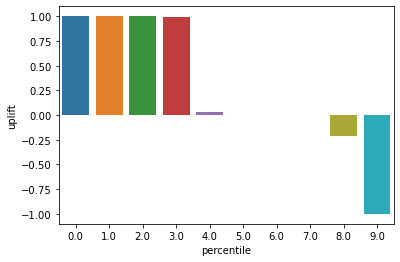

In [163]:
ax = sns.barplot(hist_twomod["percentile"],hist_twomod['uplift'])

Here as well, we can reduce churn by 100% in the first decile.

If we compare both approaches,the first three deciles of class modification approach seems to be higher than the two models approach.

We can obtain the perfect model by creating a fake uplift variable with :

higher value on treatment set if outcome is 1 (persuadables)

lower value on control if outcome is 1 (sure things)

In [164]:
hist_twomod = get_hist(test_df, "perfect","is_treatment","Outcome")
hist_twomod

<ipython-input-158-a5f5a30b2867>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control["percentile"] =  np.floor(control[upliftcol].rank(method='first',ascending = False) / (control.shape[0]+1) * p)
<ipython-input-158-a5f5a30b2867>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment["percentile"] =  np.floor(treatment[upliftcol].rank(method='first',ascending = False) / (treatment.shape[0]+1) * p)


,percentile,prob_control,prob_target,uplift
0,0.0,0.000000,1.000000,1.000000
1,1.0,0.000000,1.000000,1.000000
2,2.0,0.000000,1.000000,1.000000
3,3.0,0.000000,1.000000,1.000000
4,4.0,0.733096,1.000000,0.266904
5,5.0,1.000000,1.000000,0.000000
6,6.0,1.000000,1.000000,0.000000
7,7.0,1.000000,1.000000,0.000000
8,8.0,1.000000,0.546763,-0.453237
9,9.0,1.000000,0.000000,-1.000000


C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


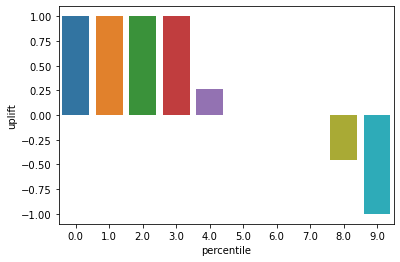

In [165]:
ax = sns.barplot(hist_twomod["percentile"],hist_twomod['uplift'])

the top ‘decile’ has an actual uplift of 100%, since it contains all the persuadables. The bottom ‘decile’ has an actual uplift of -100%, since it contains all the sleeping dogs. The remaining sure things and lost causes have uplift in the middle decile.

In [166]:
test_df

,predicted_value,Customer_type,Treatment_control,Outcome,train_test,History_of_Complaint_yn_0,History_of_Complaint_yn_1,Agent_yn_0,Agent_yn_1,Email_Subscription_yn_0,...,Policies_More_Than_One_yn_0,Policies_More_Than_One_yn_1,Benefits_Added_yn_0,Benefits_Added_yn_1,proba_outcome_treatment,proba_outcome_control,uplift_1,uplift_2,is_treatment,perfect
22371,0,Sure_Things,Treatment,1,test,1,0,1,0,1,...,1,0,1,0,1.000000e+00,1.000000e+00,0.0,0.013823,1,1
22372,0,Persuadables,Treatment,1,test,1,0,1,0,0,...,0,1,1,0,1.000000e+00,1.091421e-22,1.0,1.000000,1,1
22373,0,Sleeping_Dogs,Control,1,test,0,1,0,1,1,...,0,1,1,0,1.480592e-22,1.000000e+00,-1.0,-1.000000,0,-1
22374,0,Sure_Things,Control,1,test,1,0,1,0,0,...,1,0,1,0,1.000000e+00,1.000000e+00,0.0,-0.025185,0,-1
22375,0,Sure_Things,Control,1,test,1,0,1,0,0,...,1,0,1,0,1.000000e+00,1.000000e+00,0.0,-0.025185,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27959,0,Sure_Things,Treatment,1,test,1,0,0,1,1,...,1,0,1,0,1.000000e+00,1.000000e+00,0.0,0.022065,1,1
27960,0,Sleeping_Dogs,Treatment,0,test,0,1,0,1,0,...,0,1,1,0,1.480592e-22,1.000000e+00,-1.0,-1.000000,1,0
27961,0,Sleeping_Dogs,Control,1,test,0,1,1,0,0,...,0,1,1,0,1.480592e-22,1.000000e+00,-1.0,-1.000000,0,-1
27962,0,Persuadables,Control,0,test,1,0,1,0,0,...,0,1,1,0,1.000000e+00,1.091421e-22,1.0,1.000000,0,0


# Cumulative Uplift Bins

The uplift evaluation for each bin is : RT(t)/NT(t) - RC(t)/NC(t).

With :

->RT(t) number of positive outcome and treated

->RC(t) number of positive outcome and belonging to control

->NT(t) number of treated

->NC(t) number belonging to control

In [167]:
#Cumulative Uplift bins

def get_hist_cum(df, upliftcol,targetcol, outcome_col,p=10) :
    tmp = df.copy()
    tmp = tmp.sort_values(upliftcol,ascending=False)
    tmp["percentile"] =  np.floor(tmp[upliftcol].rank(method='first',ascending = False) / (tmp.shape[0]+1) * p)
    final = []
    for val in range(p) :
        t = tmp[tmp['percentile']<=val]
        target = float(t[t[targetcol]==1][outcome_col].mean())
        control = float(t[t[targetcol]==0][outcome_col].mean())        
        uplift = (target - control) 
        final.append({'percentile':val,"uplift":uplift})
    return pd.DataFrame(final)

In [168]:
def get_hist_cum_2(df, upliftcol,targetcol, outcome_col,p=10) :
    tmp = df.copy()
    tmp = tmp.sort_values(upliftcol,ascending=False)
    tmp["percentile"] =  np.floor(tmp[upliftcol].rank(method='first',ascending = False) / (tmp.shape[0]+1) * p)
    final = []
    for val in range(p) :
        t = tmp[tmp['percentile']<=val]
        target = float(t[t[targetcol]==1][outcome_col].mean())
        control = float(t[t[targetcol]==0][outcome_col].mean())        
        uplift = (target - control) * t.shape[0]
        final.append({'percentile':val,"uplift":uplift})
    return pd.DataFrame(final)

C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


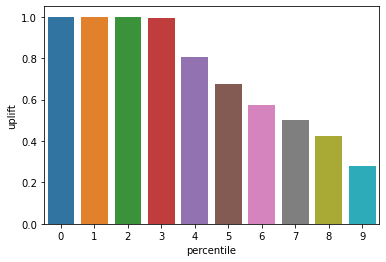

In [169]:
hist_twomod = get_hist_cum(test_df, "uplift_1","is_treatment","Outcome",p=10)
ax = sns.barplot(hist_twomod["percentile"],hist_twomod['uplift'])

C:\Users\sherine chally\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


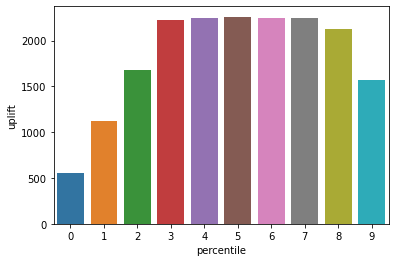

In [170]:
hist_twomod = get_hist_cum_2(test_df, "uplift_1","is_treatment","Outcome",p=10)
ax = sns.barplot(hist_twomod["percentile"],hist_twomod['uplift'])

# Uplift Curve

Uplift Curve is a simple generalization of Uplift per decile.

The better the area under the curve the better -> comparable to AUC

In [171]:
#uplift curve

def uplift(df, target_control_col, outcome_col, proba_col) :
    tmp = df.copy()
    tmp = tmp.sort_values(proba_col,ascending=False)
    tmp['RT'] = (tmp[target_control_col]*tmp[outcome_col]).cumsum()
    tmp['RC'] = ((1-tmp[target_control_col])*tmp[outcome_col]).cumsum()
    tmp['NT'] = tmp[target_control_col].cumsum()
    tmp['NC'] = (1-tmp[target_control_col]).cumsum()
    tmp["upc_1"] =   ((tmp['RT']/tmp['NT']).fillna(0) - (tmp['RC']/tmp['NC']).fillna(0)) *(tmp['NC']+tmp['NT'])
    return tmp["upc_1"].values

In [172]:
two_mod_uc = uplift(test_df,'is_treatment','Outcome','uplift_1')
modified_uc = uplift(test_df,'is_treatment','Outcome','uplift_2')
perfect_uc = uplift(test_df,'is_treatment','Outcome','perfect')
rd_uc = (test_df[test_df['is_treatment']==1]['Outcome'].sum() / float(test_df[test_df['is_treatment']==1].shape[0])
        - test_df[test_df['is_treatment']==0]['Outcome'].sum() / float(test_df[test_df['is_treatment']==0].shape[0]) )
rd = np.arange(test_df.shape[0]) * rd_uc

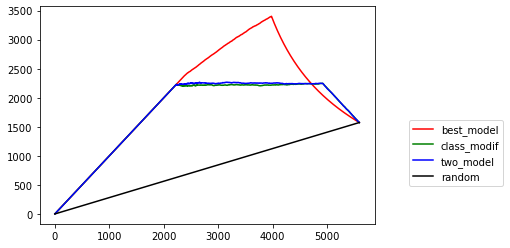

In [173]:
plt.plot(np.arange(test_df.shape[0]),perfect_uc, color = 'r', label = 'best_model')
plt.plot(np.arange(test_df.shape[0]),modified_uc, color =  'g', label = 'class_modif')
plt.plot(np.arange(test_df.shape[0]),two_mod_uc, color = 'b', label = 'two_model')
plt.plot(np.arange(test_df.shape[0]),rd,color = 'k', label = 'random')
plt.legend(bbox_to_anchor=(1.4, 0.5))

Both approaches performs well based on the outputs

# Method 2:Using Uplift package

In [183]:
###############using uplift package to get better results

In [184]:
dataset=pd.read_csv('predictions_modified.csv')

In [185]:
dataset

,Unnamed: 0,predicted_value,Customer_type,Treatment_control,Outcome,train_test,History_of_Complaint_yn_0,History_of_Complaint_yn_1,Agent_yn_0,Agent_yn_1,Email_Subscription_yn_0,Email_Subscription_yn_1,Policies_More_Than_One_yn_0,Policies_More_Than_One_yn_1,Benefits_Added_yn_0,Benefits_Added_yn_1
0,0,0,Sleeping_Dogs,Treatment,0,train,0,1,1,0,0,1,0,1,1,0
1,1,0,Persuadables,Treatment,1,train,1,0,1,0,1,0,0,1,1,0
2,2,0,Persuadables,Control,0,train,1,0,1,0,1,0,0,1,1,0
3,3,0,Sleeping_Dogs,Treatment,0,train,0,1,1,0,0,1,0,1,1,0
4,4,0,Sleeping_Dogs,Control,1,train,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27959,27959,0,Sure_Things,Treatment,1,test,1,0,0,1,1,0,1,0,1,0
27960,27960,0,Sleeping_Dogs,Treatment,0,test,0,1,0,1,0,1,0,1,1,0
27961,27961,0,Sleeping_Dogs,Control,1,test,0,1,1,0,0,1,0,1,1,0
27962,27962,0,Persuadables,Control,0,test,1,0,1,0,0,1,0,1,1,0


In [186]:
dataset['Treatment_control']=dataset['Treatment_control'].map({'Control': 0, 'Treatment': 1})

In [187]:
dataset['Treatment_control']

0        1
1        1
2        0
3        1
4        0
        ..
27959    1
27960    1
27961    0
27962    0
27963    1
Name: Treatment_control, Length: 27964, dtype: int64

In [188]:
pd.crosstab(dataset['Treatment_control'], dataset['Outcome'], normalize='index')

Outcome,0,1
Treatment_control,,
0,0.410993,0.589007
1,0.145182,0.854818


In [189]:
#creating dummy variables for just the features
# dummify
feat = [x  for x in dataset.columns if '_yn'in x]
features = []
for f in feat : 
    dummies = pd.get_dummies(dataset[f]).rename(columns=lambda x: f + "_" + str(x))
    features = features + list(dummies.columns)
    dataset = pd.concat([dataset, dummies], axis=1)
    dataset = dataset.drop([f], axis=1)
    print("done", f)

done History_of_Complaint_yn_0
done History_of_Complaint_yn_1
done Agent_yn_0
done Agent_yn_1
done Email_Subscription_yn_0
done Email_Subscription_yn_1
done Policies_More_Than_One_yn_0
done Policies_More_Than_One_yn_1
done Benefits_Added_yn_0
done Benefits_Added_yn_1


In [190]:
# train test split
# stratify by two columns: treatment and target.
# Intuition: In a binary classification problem definition we stratify train set by splitting target 0/1 column. 
#In uplift modeling we have two columns instead of one.

from sklearn.model_selection import train_test_split
stratify_cols = pd.concat([dataset['Treatment_control'], dataset['Outcome']], axis=1)

X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = train_test_split(
    dataset[features],
    dataset['Treatment_control'],
    dataset['Outcome'],
    stratify=stratify_cols,
    test_size=0.3,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (19574, 20)
Validation shape: (8390, 20)


In [191]:
trmnt_train

15892    1
15667    0
23910    0
26298    0
19978    0
        ..
19531    1
4353     1
7680     1
21311    1
271      1
Name: Treatment_control, Length: 19574, dtype: int64

# Class Transformation Uplift Model

In [192]:
# Class Transformation uplift model
from sklift.models import ClassTransformation
from catboost import CatBoostClassifier

estimator = CatBoostClassifier(verbose=100,
                               random_state=42,
                               thread_count=1)

ct_model = ClassTransformation(estimator=estimator)

In [193]:

ct_model.fit(
    X=X_train, 
    y=y_train, 
    treatment=trmnt_train
)

Learning rate set to 0.036684
0:	learn: 0.6262882	total: 294ms	remaining: 4m 53s
100:	learn: 0.3411660	total: 2.89s	remaining: 25.8s
200:	learn: 0.3408433	total: 4.93s	remaining: 19.6s
300:	learn: 0.3407275	total: 7.3s	remaining: 16.9s
400:	learn: 0.3406953	total: 9.84s	remaining: 14.7s
500:	learn: 0.3406953	total: 12.2s	remaining: 12.1s
600:	learn: 0.3406953	total: 14.5s	remaining: 9.62s
700:	learn: 0.3406953	total: 16.9s	remaining: 7.22s
800:	learn: 0.3406953	total: 19.3s	remaining: 4.8s
900:	learn: 0.3406953	total: 22.2s	remaining: 2.44s
999:	learn: 0.3406953	total: 25s	remaining: 0us


ClassTransformation(estimator=<catboost.core.CatBoostClassifier object at 0x000001E358D78DC0>)

In [194]:
#save model
import dill

with open("model.dill", 'wb') as f:
    dill.dump(ct_model, f)

In [195]:
#uplift prediction
uplift_ct = ct_model.predict(X_val)

In [196]:
uplift_ct

array([-0.011926  , -0.01127657, -0.01127657, ...,  0.9995413 ,
       -0.01127657,  0.01428804])

In [197]:
y_val.value_counts()

1    6059
0    2331
Name: Outcome, dtype: int64

In [198]:
trmnt_val

26991    1
24235    1
8184     1
873      1
27882    1
        ..
21054    1
14904    0
5438     0
11331    1
22999    0
Name: Treatment_control, Length: 8390, dtype: int64

In [199]:
# Uplift metrics

uplift@k
uplift at first k%
usually falls between [0; 1] depending on k, model quality and data
Code parameter options:

strategy='overall' - sort by uplift treatment and control together
strategy='by_group' - sort by uplift treatment and control separately

In [200]:
from sklift.metrics import uplift_at_k

# k = 10%
k = 0.1 

# strategy='overall' sort by uplift treatment and control together
uplift_overall = uplift_at_k(y_val, uplift_ct, trmnt_val, strategy='overall', k=k)

# strategy='by_group' sort by uplift treatment and control separately
uplift_bygroup = uplift_at_k(y_val, uplift_ct, trmnt_val, strategy='by_group', k=k)


print(f"uplift@{k * 100:.0f}%: {uplift_overall:.4f} (sort groups by uplift together)")
print(f"uplift@{k * 100:.0f}%: {uplift_bygroup:.4f} (sort groups by uplift separately)")

uplift@10%: 1.0000 (sort groups by uplift together)
uplift@10%: 1.0000 (sort groups by uplift separately)


# uplift_by_percentile table
n_treatment - treatment group size in the one percentile

n_control - control group size in the one percentile

response_rate_treatment - target mean in the treatment group in the one percentile

response_rate_control - target mean in the control group in the one percentile

uplift = response_rate_treatment - response_rate_control in the one percentile

In [201]:
#uplift_by_percentile table
from sklift.metrics import uplift_by_percentile

uplift_by_percentile(y_val, uplift_ct, trmnt_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

C:\Users\sherine chally\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,434,405,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
10-20,418,421,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
20-30,424,415,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
30-40,406,433,0.859606,0.000000,0.859606,0.017241,0.000000,0.017241
40-50,426,413,0.894366,0.886199,0.008168,0.014892,0.015627,0.021586
50-60,413,426,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
60-70,406,433,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
70-80,404,435,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
80-90,442,397,0.823529,1.000000,-0.176471,0.018133,0.000000,0.018133


# weighted average uplift
counts uplift on full data

uses results from uplift_by_percentile table

result depends on number of bins

In [202]:
#weighted average uplift
from sklift.metrics import weighted_average_uplift

uplift_full_data = weighted_average_uplift(y_val, uplift_ct, trmnt_val, bins=10) 
print(f"average uplift on full data: {uplift_full_data:.4f}")

average uplift on full data: 0.2666


# uplift_by_percentile plot
visualize results of uplift_by_percentile table

Two ways to plot:

line plot kind='line'

bar plot kind='bar'

C:\Users\sherine chally\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:title={'center':'Uplift by percentile\nweighted average uplift = 0.2659'}, xlabel='Percentile', ylabel='Uplift = treatment response rate - control response rate'>

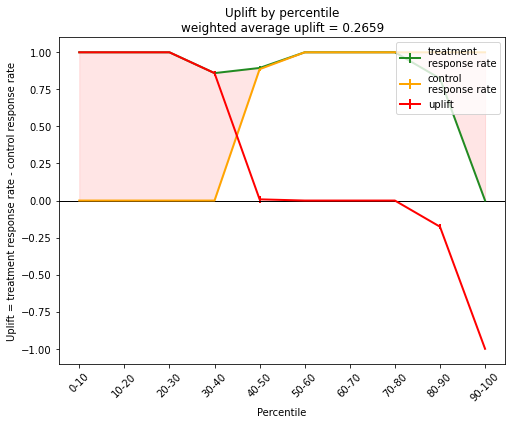

In [203]:
from sklift.viz import plot_uplift_by_percentile
plot_uplift_by_percentile(y_val, uplift_ct, trmnt_val, strategy='overall', kind='line')

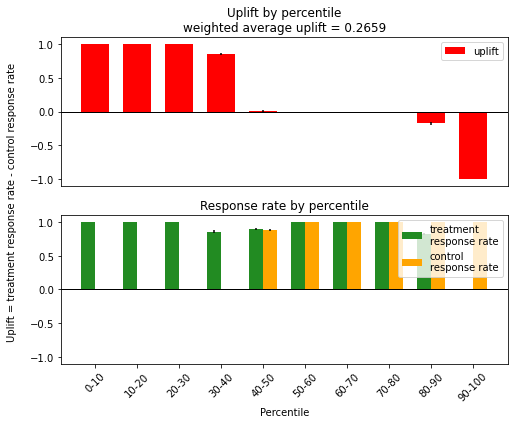

In [204]:
# bar plot
plot_uplift_by_percentile(y_val, uplift_ct, trmnt_val, strategy='overall', kind='bar');

# Uplift Curve
The Uplift curve plots incremental uplift.

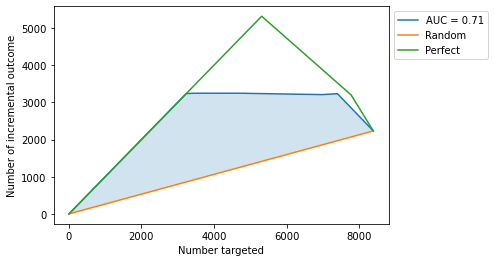

In [208]:
from sklift.viz import plot_uplift_curve

# with ideal curve
# perfect=True
plot_uplift_curve(y_val, uplift_ct, trmnt_val, perfect=True);

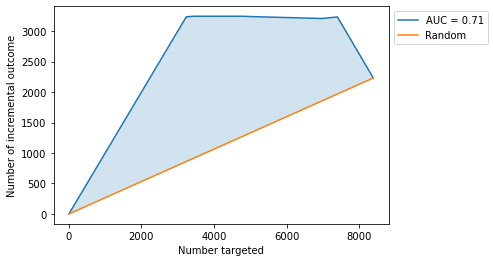

In [209]:
# only real
# perfect=False
plot_uplift_curve(y_val, uplift_ct, trmnt_val, perfect=False);

In [210]:

from sklift.metrics import uplift_auc_score

# AUUQ = area under uplift curve
auuc = uplift_auc_score(y_val, uplift_ct, trmnt_val) 
print(f"Uplift auc score on full data: {auuc:.4f}")

Uplift auc score on full data: 0.7119
